In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git 

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 4996 (delta 9), reused 8 (delta 4), pack-reused 4978
Receiving objects: 100% (4996/4996), 153.99 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (1439/1439), done.
Checking out files: 100% (4675/4675), done.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the other file
#! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=8930cc0b125fb8a9f6393b2a85815f63c61768519c96a2d3a42554b8c2ca9404
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=1c55b019bd1523df8028dc3b5cbbd01229b7a19b56dc71a985287311ae87a4ac
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
!pip install xmltodict

In [ ]:
import os
import sys
import numpy as np
import pandas as pd

import xmltodict
import json
from tqdm.notebook import tqdm

from pycocotools.coco import COCO

In [ ]:
root_dir = "Waste_Dataset/";
img_dir = "Images_merged/";
anno_dir = "Annotations_merged/";

In [ ]:
 files = os.listdir(root_dir + anno_dir);
 print(files)

['image1.xml', 'image2.xml', 'image3.xml', 'image4.xml', 'image5.xml', 'image6.xml', 'image7.xml', 'image8.xml', 'image9.xml', 'image10.xml', 'image11.xml', 'image12.xml', 'image13.xml', 'image14.xml', 'image15.xml', 'image16.xml', 'image17.xml', 'image18.xml', 'image19.xml', 'image20.xml', 'image21.xml', 'image22.xml', 'image23.xml', 'image24.xml', 'image25.xml', 'image26.xml', 'image27.xml', 'image28.xml', 'image29.xml', 'image30.xml', 'image31.xml', 'image32.xml', 'image33.xml', 'image34.xml', 'image35.xml', 'image36.xml', 'image37.xml', 'image38.xml', 'image39.xml', 'image40.xml', 'image41.xml', 'image42.xml', 'image43.xml', 'image44.xml', 'image45.xml', 'image46.xml', 'image47.xml', 'image48.xml', 'image49.xml', 'image50.xml', 'image51.xml', 'image52.xml', 'image53.xml', 'image54.xml', 'image55.xml', 'image56.xml', 'image57.xml', 'image58.xml', 'image59.xml', 'image60.xml', 'image61.xml', 'image62.xml', 'image63.xml', 'image64.xml', 'image65.xml', 'image66.xml', 'image67.xml', 'im

In [ ]:
combined = [];
for i in tqdm(range(len(files))):
    annoFile = root_dir + "/" + anno_dir + "/" + files[i];
    f = open(annoFile, 'r');
    my_xml = f.read();
    anno = dict(dict(xmltodict.parse(my_xml))["annotation"])
    fname = anno["filename"];
    label_str = "";
    if(type(anno["object"]) == list ):
        for j in range(len(anno["object"])):
            obj = dict(anno["object"][j]);
            label = anno["object"][j]["name"];
            bbox = dict(anno["object"][j]["bndbox"])
            x1 = bbox["xmin"];
            y1 = bbox["ymin"];
            x2 = bbox["xmax"];
            y2 = bbox["ymax"];
            if(j == len(anno["object"])-1):
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
            else:        
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label + " ";
    else:
        obj = dict(anno["object"]);
        label = anno["object"]["name"];
        bbox = dict(anno["object"]["bndbox"])
        x1 = bbox["xmin"];
        y1 = bbox["ymin"];
        x2 = bbox["xmax"];
        y2 = bbox["ymax"];
        
        label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
    
    
    combined.append([fname, label_str])

In [ ]:
print(combined)

[['image1.jpg', '77 82 164 151 wet_waste'], ['image2.jpg', '10 17 268 174 wet_waste'], ['image3.jpg', '3 10 214 207 wet_waste'], ['image4.jpg', '58 24 198 79 wet_waste'], ['image5.jpg', '47 78 116 152 wet_waste'], ['image6.jpg', '1 1 176 264 wet_waste'], ['image7.jpg', '213 5 285 163 wet_waste'], ['image8.jpg', '132 10 208 79 wet_waste'], ['image9.jpg', '116 68 233 164 wet_waste'], ['image10.jpg', '17 1 293 170 wet_waste'], ['image11.jpg', '114 2 246 77 wet_waste'], ['image12.jpg', '27 18 236 162 wet_waste'], ['image13.jpg', '1 2 150 162 wet_waste'], ['image14.jpg', '45 4 258 161 wet_waste'], ['image15.jpg', '160 61 218 160 wet_waste'], ['image16.jpg', '2 2 262 168 wet_waste'], ['image17.jpg', '1 2 273 169 wet_waste'], ['image18.jpg', '138 32 192 80 wet_waste'], ['image19.jpg', '121 51 180 108 wet_waste'], ['image20.jpg', '22 33 198 217 wet_waste'], ['image21.jpg', '1 38 222 200 wet_waste'], ['image22.jpg', '83 19 176 121 wet_waste'], ['image23.jpg', '35 6 249 167 wet_waste'], ['image2

In [ ]:
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv(root_dir + "/train_labels.csv", index=False);

In [ ]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [ ]:
root = "Waste_Dataset/";
img_dir = "Images_merged/";
anno_file = "train_labels.csv";

In [ ]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [ ]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [ ]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [ ]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [ ]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [ ]:
delimiter = " ";

In [ ]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 2/2 [00:00<00:00, 767.34it/s]


In [ ]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    print(image_in_path)
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  0%|          | 0/800 [00:00<?, ?it/s]

Waste_Dataset//Images_merged//image1.jpg


  0%|          | 1/800 [00:00<06:59,  1.91it/s]

Waste_Dataset//Images_merged//image2.jpg


  0%|          | 2/800 [00:01<07:23,  1.80it/s]

Waste_Dataset//Images_merged//image3.jpg


  0%|          | 3/800 [00:01<07:28,  1.78it/s]

Waste_Dataset//Images_merged//image4.jpg


  0%|          | 4/800 [00:02<07:49,  1.69it/s]

Waste_Dataset//Images_merged//image5.jpg


  1%|          | 5/800 [00:02<07:53,  1.68it/s]

Waste_Dataset//Images_merged//image6.jpg


  1%|          | 6/800 [00:03<07:36,  1.74it/s]

Waste_Dataset//Images_merged//image7.jpg


  1%|          | 7/800 [00:04<09:16,  1.43it/s]

Waste_Dataset//Images_merged//image8.jpg


  1%|          | 8/800 [00:05<09:17,  1.42it/s]

Waste_Dataset//Images_merged//image9.jpg


  1%|          | 9/800 [00:05<08:35,  1.53it/s]

Waste_Dataset//Images_merged//image10.jpg


  1%|▏         | 10/800 [00:06<08:14,  1.60it/s]

Waste_Dataset//Images_merged//image11.jpg


  1%|▏         | 11/800 [00:08<12:28,  1.05it/s]

Waste_Dataset//Images_merged//image12.jpg


  2%|▏         | 12/800 [00:08<10:42,  1.23it/s]

Waste_Dataset//Images_merged//image13.jpg


  2%|▏         | 13/800 [00:09<10:26,  1.26it/s]

Waste_Dataset//Images_merged//image14.jpg


  2%|▏         | 14/800 [00:10<10:27,  1.25it/s]

Waste_Dataset//Images_merged//image15.jpg


  2%|▏         | 15/800 [00:10<09:19,  1.40it/s]

Waste_Dataset//Images_merged//image16.jpg


  2%|▏         | 16/800 [00:11<08:26,  1.55it/s]

Waste_Dataset//Images_merged//image17.jpg


  2%|▏         | 17/800 [00:11<07:52,  1.66it/s]

Waste_Dataset//Images_merged//image18.jpg


  2%|▏         | 18/800 [00:12<08:24,  1.55it/s]

Waste_Dataset//Images_merged//image19.jpg


  2%|▏         | 19/800 [00:12<07:46,  1.67it/s]

Waste_Dataset//Images_merged//image20.jpg


  2%|▎         | 20/800 [00:13<08:10,  1.59it/s]

Waste_Dataset//Images_merged//image21.jpg


  3%|▎         | 21/800 [00:14<08:02,  1.61it/s]

Waste_Dataset//Images_merged//image22.jpg


  3%|▎         | 22/800 [00:14<07:25,  1.75it/s]

Waste_Dataset//Images_merged//image23.jpg


  3%|▎         | 23/800 [00:15<06:58,  1.85it/s]

Waste_Dataset//Images_merged//image24.jpg


  3%|▎         | 24/800 [00:15<06:46,  1.91it/s]

Waste_Dataset//Images_merged//image25.jpg


  3%|▎         | 25/800 [00:16<06:44,  1.92it/s]

Waste_Dataset//Images_merged//image26.jpg


  3%|▎         | 26/800 [00:16<06:29,  1.99it/s]

Waste_Dataset//Images_merged//image27.jpg


  3%|▎         | 27/800 [00:17<06:27,  1.99it/s]

Waste_Dataset//Images_merged//image28.jpg


  4%|▎         | 28/800 [00:17<06:14,  2.06it/s]

Waste_Dataset//Images_merged//image29.jpg


  4%|▎         | 29/800 [00:17<06:00,  2.14it/s]

Waste_Dataset//Images_merged//image30.jpg


  4%|▍         | 30/800 [00:18<06:20,  2.02it/s]

Waste_Dataset//Images_merged//image31.jpg


  4%|▍         | 31/800 [00:18<06:19,  2.02it/s]

Waste_Dataset//Images_merged//image32.jpg


  4%|▍         | 32/800 [00:19<06:16,  2.04it/s]

Waste_Dataset//Images_merged//image33.jpg


  4%|▍         | 33/800 [00:19<06:19,  2.02it/s]

Waste_Dataset//Images_merged//image34.jpg


  4%|▍         | 34/800 [00:20<06:05,  2.10it/s]

Waste_Dataset//Images_merged//image35.jpg


  4%|▍         | 35/800 [00:20<06:09,  2.07it/s]

Waste_Dataset//Images_merged//image36.jpg


  4%|▍         | 36/800 [00:21<07:10,  1.78it/s]

Waste_Dataset//Images_merged//image37.jpg


  5%|▍         | 37/800 [00:22<07:05,  1.79it/s]

Waste_Dataset//Images_merged//image38.jpg


  5%|▍         | 38/800 [00:22<06:53,  1.84it/s]

Waste_Dataset//Images_merged//image39.jpg


  5%|▍         | 39/800 [00:23<07:34,  1.68it/s]

Waste_Dataset//Images_merged//image40.jpg


  5%|▌         | 40/800 [00:23<07:06,  1.78it/s]

Waste_Dataset//Images_merged//image41.jpg


  5%|▌         | 41/800 [00:24<06:42,  1.89it/s]

Waste_Dataset//Images_merged//image42.jpg


  5%|▌         | 42/800 [00:24<06:58,  1.81it/s]

Waste_Dataset//Images_merged//image43.jpg


  5%|▌         | 43/800 [00:25<07:43,  1.63it/s]

Waste_Dataset//Images_merged//image44.jpg


  6%|▌         | 44/800 [00:26<07:19,  1.72it/s]

Waste_Dataset//Images_merged//image45.jpg


  6%|▌         | 45/800 [00:26<07:11,  1.75it/s]

Waste_Dataset//Images_merged//image46.jpg


  6%|▌         | 46/800 [00:27<06:51,  1.83it/s]

Waste_Dataset//Images_merged//image47.jpg


  6%|▌         | 47/800 [00:27<06:52,  1.82it/s]

Waste_Dataset//Images_merged//image48.jpg


  6%|▌         | 48/800 [00:28<06:41,  1.87it/s]

Waste_Dataset//Images_merged//image49.jpg


  6%|▌         | 49/800 [00:28<06:28,  1.93it/s]

Waste_Dataset//Images_merged//image50.jpg


  6%|▋         | 50/800 [00:29<06:07,  2.04it/s]

Waste_Dataset//Images_merged//image51.jpg


  6%|▋         | 51/800 [00:29<06:05,  2.05it/s]

Waste_Dataset//Images_merged//image52.jpg


  6%|▋         | 52/800 [00:30<06:58,  1.79it/s]

Waste_Dataset//Images_merged//image53.jpg


  7%|▋         | 53/800 [00:30<06:58,  1.78it/s]

Waste_Dataset//Images_merged//image54.jpg


  7%|▋         | 54/800 [00:31<06:58,  1.78it/s]

Waste_Dataset//Images_merged//image55.jpg


  7%|▋         | 55/800 [00:32<06:44,  1.84it/s]

Waste_Dataset//Images_merged//image56.jpg


  7%|▋         | 56/800 [00:32<06:33,  1.89it/s]

Waste_Dataset//Images_merged//image57.jpg


  7%|▋         | 57/800 [00:33<06:29,  1.91it/s]

Waste_Dataset//Images_merged//image58.jpg


  7%|▋         | 58/800 [00:33<06:35,  1.87it/s]

Waste_Dataset//Images_merged//image59.jpg


  7%|▋         | 59/800 [00:34<06:31,  1.89it/s]

Waste_Dataset//Images_merged//image60.jpg


  8%|▊         | 60/800 [00:34<06:20,  1.95it/s]

Waste_Dataset//Images_merged//image61.jpg


  8%|▊         | 61/800 [00:35<06:18,  1.95it/s]

Waste_Dataset//Images_merged//image62.jpg


  8%|▊         | 62/800 [00:35<06:02,  2.04it/s]

Waste_Dataset//Images_merged//image63.jpg


  8%|▊         | 63/800 [00:35<05:59,  2.05it/s]

Waste_Dataset//Images_merged//image64.jpg


  8%|▊         | 64/800 [00:36<05:46,  2.13it/s]

Waste_Dataset//Images_merged//image65.jpg


  8%|▊         | 65/800 [00:37<06:13,  1.97it/s]

Waste_Dataset//Images_merged//image66.jpg


  8%|▊         | 66/800 [00:37<06:13,  1.97it/s]

Waste_Dataset//Images_merged//image67.jpg


  8%|▊         | 67/800 [00:37<05:58,  2.04it/s]

Waste_Dataset//Images_merged//image68.jpg


  8%|▊         | 68/800 [00:38<06:00,  2.03it/s]

Waste_Dataset//Images_merged//image69.jpg


  9%|▊         | 69/800 [00:38<05:44,  2.12it/s]

Waste_Dataset//Images_merged//image70.jpg


  9%|▉         | 70/800 [00:39<05:34,  2.18it/s]

Waste_Dataset//Images_merged//image71.jpg


  9%|▉         | 71/800 [00:39<05:47,  2.10it/s]

Waste_Dataset//Images_merged//image72.jpg


  9%|▉         | 72/800 [00:40<05:52,  2.06it/s]

Waste_Dataset//Images_merged//image73.jpg


  9%|▉         | 73/800 [00:40<05:52,  2.07it/s]

Waste_Dataset//Images_merged//image74.jpg


  9%|▉         | 74/800 [00:41<05:41,  2.13it/s]

Waste_Dataset//Images_merged//image75.jpg


  9%|▉         | 75/800 [00:41<05:57,  2.03it/s]

Waste_Dataset//Images_merged//image76.jpg


 10%|▉         | 76/800 [00:42<05:55,  2.04it/s]

Waste_Dataset//Images_merged//image77.jpg


 10%|▉         | 77/800 [00:42<06:02,  1.99it/s]

Waste_Dataset//Images_merged//image78.jpg


 10%|▉         | 78/800 [00:43<05:52,  2.05it/s]

Waste_Dataset//Images_merged//image79.jpg


 10%|▉         | 79/800 [00:43<05:54,  2.03it/s]

Waste_Dataset//Images_merged//image80.jpg


 10%|█         | 80/800 [00:44<05:49,  2.06it/s]

Waste_Dataset//Images_merged//image81.jpg


 10%|█         | 81/800 [00:44<05:53,  2.04it/s]

Waste_Dataset//Images_merged//image82.jpg


 10%|█         | 82/800 [00:45<06:03,  1.98it/s]

Waste_Dataset//Images_merged//image83.jpg


 10%|█         | 83/800 [00:45<05:45,  2.08it/s]

Waste_Dataset//Images_merged//image84.jpg


 10%|█         | 84/800 [00:46<05:52,  2.03it/s]

Waste_Dataset//Images_merged//image85.jpg


 11%|█         | 85/800 [00:46<05:50,  2.04it/s]

Waste_Dataset//Images_merged//image86.jpg


 11%|█         | 86/800 [00:47<05:51,  2.03it/s]

Waste_Dataset//Images_merged//image87.jpg


 11%|█         | 87/800 [00:47<05:51,  2.03it/s]

Waste_Dataset//Images_merged//image88.jpg


 11%|█         | 88/800 [00:48<05:49,  2.04it/s]

Waste_Dataset//Images_merged//image89.jpg


 11%|█         | 89/800 [00:48<05:54,  2.00it/s]

Waste_Dataset//Images_merged//image90.jpg


 11%|█▏        | 90/800 [00:49<05:51,  2.02it/s]

Waste_Dataset//Images_merged//image91.jpg


 11%|█▏        | 91/800 [00:49<06:04,  1.94it/s]

Waste_Dataset//Images_merged//image92.jpg


 12%|█▏        | 92/800 [00:50<06:38,  1.78it/s]

Waste_Dataset//Images_merged//image93.jpg


 12%|█▏        | 93/800 [00:51<07:24,  1.59it/s]

Waste_Dataset//Images_merged//image94.jpg


 12%|█▏        | 94/800 [00:51<06:45,  1.74it/s]

Waste_Dataset//Images_merged//image95.jpg


 12%|█▏        | 95/800 [00:52<06:35,  1.78it/s]

Waste_Dataset//Images_merged//image96.jpg


 12%|█▏        | 96/800 [00:52<06:26,  1.82it/s]

Waste_Dataset//Images_merged//image97.jpg


 12%|█▏        | 97/800 [00:53<06:12,  1.89it/s]

Waste_Dataset//Images_merged//image98.jpg


 12%|█▏        | 98/800 [00:54<07:09,  1.63it/s]

Waste_Dataset//Images_merged//image99.jpg


 12%|█▏        | 99/800 [00:54<06:50,  1.71it/s]

Waste_Dataset//Images_merged//image100.jpg


 12%|█▎        | 100/800 [00:55<07:54,  1.48it/s]

Waste_Dataset//Images_merged//image102.jpg


 13%|█▎        | 101/800 [00:55<07:19,  1.59it/s]

Waste_Dataset//Images_merged//image103.jpg


 13%|█▎        | 102/800 [00:56<07:44,  1.50it/s]

Waste_Dataset//Images_merged//image104.jpg


 13%|█▎        | 103/800 [00:57<07:14,  1.61it/s]

Waste_Dataset//Images_merged//image105.jpg


 13%|█▎        | 104/800 [00:58<08:06,  1.43it/s]

Waste_Dataset//Images_merged//image106.jpg


 13%|█▎        | 105/800 [00:58<07:28,  1.55it/s]

Waste_Dataset//Images_merged//image107.jpg


 13%|█▎        | 106/800 [00:59<09:08,  1.27it/s]

Waste_Dataset//Images_merged//image108.jpg


 13%|█▎        | 107/800 [01:00<08:15,  1.40it/s]

Waste_Dataset//Images_merged//image109.jpg


 14%|█▎        | 108/800 [01:00<07:32,  1.53it/s]

Waste_Dataset//Images_merged//image110.jpg


 14%|█▎        | 109/800 [01:01<06:55,  1.66it/s]

Waste_Dataset//Images_merged//image111.jpg


 14%|█▍        | 110/800 [01:02<07:28,  1.54it/s]

Waste_Dataset//Images_merged//image112.jpg


 14%|█▍        | 111/800 [01:02<07:03,  1.63it/s]

Waste_Dataset//Images_merged//image113.jpg


 14%|█▍        | 112/800 [01:04<10:59,  1.04it/s]

Waste_Dataset//Images_merged//image114.jpg


 14%|█▍        | 113/800 [01:04<09:20,  1.23it/s]

Waste_Dataset//Images_merged//image115.jpg


 14%|█▍        | 114/800 [01:05<09:16,  1.23it/s]

Waste_Dataset//Images_merged//image116.jpg


 14%|█▍        | 115/800 [01:06<08:10,  1.40it/s]

Waste_Dataset//Images_merged//image117.jpg


 14%|█▍        | 116/800 [01:06<07:14,  1.57it/s]

Waste_Dataset//Images_merged//image118.jpg


 15%|█▍        | 117/800 [01:07<06:38,  1.71it/s]

Waste_Dataset//Images_merged//image119.jpg


 15%|█▍        | 118/800 [01:07<06:19,  1.80it/s]

Waste_Dataset//Images_merged//image120.jpg


 15%|█▍        | 119/800 [01:08<06:09,  1.84it/s]

Waste_Dataset//Images_merged//metal1.jpg


 15%|█▌        | 120/800 [01:08<06:28,  1.75it/s]

Waste_Dataset//Images_merged//metal5.jpg


 15%|█▌        | 121/800 [01:09<06:07,  1.85it/s]

Waste_Dataset//Images_merged//metal6.jpg


 15%|█▌        | 122/800 [01:09<06:03,  1.86it/s]

Waste_Dataset//Images_merged//metal7.jpg


 15%|█▌        | 123/800 [01:10<06:43,  1.68it/s]

Waste_Dataset//Images_merged//metal8.jpg


 16%|█▌        | 124/800 [01:11<07:15,  1.55it/s]

Waste_Dataset//Images_merged//metal9.jpg


 16%|█▌        | 125/800 [01:11<07:40,  1.47it/s]

Waste_Dataset//Images_merged//metal10.jpg


 16%|█▌        | 126/800 [01:12<06:50,  1.64it/s]

Waste_Dataset//Images_merged//metal11.jpg


 16%|█▌        | 127/800 [01:12<06:27,  1.74it/s]

Waste_Dataset//Images_merged//metal12.jpg


 16%|█▌        | 128/800 [01:13<06:05,  1.84it/s]

Waste_Dataset//Images_merged//metal13.jpg


 16%|█▌        | 129/800 [01:13<05:50,  1.91it/s]

Waste_Dataset//Images_merged//metal14.jpg


 16%|█▋        | 130/800 [01:14<05:30,  2.03it/s]

Waste_Dataset//Images_merged//metal15.jpg


 16%|█▋        | 131/800 [01:14<05:19,  2.09it/s]

Waste_Dataset//Images_merged//metal16.jpg


 16%|█▋        | 132/800 [01:15<05:15,  2.12it/s]

Waste_Dataset//Images_merged//metal17.jpg


 17%|█▋        | 133/800 [01:15<05:47,  1.92it/s]

Waste_Dataset//Images_merged//metal18.jpg


 17%|█▋        | 134/800 [01:16<06:09,  1.80it/s]

Waste_Dataset//Images_merged//metal48.jpg


 17%|█▋        | 135/800 [01:16<05:56,  1.87it/s]

Waste_Dataset//Images_merged//metal49.jpg


 17%|█▋        | 136/800 [01:17<05:50,  1.89it/s]

Waste_Dataset//Images_merged//metal50.jpg


 17%|█▋        | 137/800 [01:17<05:58,  1.85it/s]

Waste_Dataset//Images_merged//metal51.jpg


 17%|█▋        | 138/800 [01:18<05:40,  1.95it/s]

Waste_Dataset//Images_merged//metal52.jpg


 17%|█▋        | 139/800 [01:18<05:27,  2.02it/s]

Waste_Dataset//Images_merged//metal53.jpg


 18%|█▊        | 140/800 [01:19<05:22,  2.05it/s]

Waste_Dataset//Images_merged//metal54.jpg


 18%|█▊        | 141/800 [01:19<05:21,  2.05it/s]

Waste_Dataset//Images_merged//metal55.jpg


 18%|█▊        | 142/800 [01:20<05:47,  1.89it/s]

Waste_Dataset//Images_merged//metal56.jpg


 18%|█▊        | 143/800 [01:20<05:30,  1.99it/s]

Waste_Dataset//Images_merged//metal57.jpg


 18%|█▊        | 144/800 [01:21<05:12,  2.10it/s]

Waste_Dataset//Images_merged//metal58.jpg


 18%|█▊        | 145/800 [01:21<05:45,  1.90it/s]

Waste_Dataset//Images_merged//metal59.jpg


 18%|█▊        | 146/800 [01:22<05:26,  2.00it/s]

Waste_Dataset//Images_merged//metal60.jpg


 18%|█▊        | 147/800 [01:22<05:13,  2.08it/s]

Waste_Dataset//Images_merged//metal61.jpg


 18%|█▊        | 148/800 [01:23<05:17,  2.05it/s]

Waste_Dataset//Images_merged//metal62.jpg


 19%|█▊        | 149/800 [01:23<05:07,  2.12it/s]

Waste_Dataset//Images_merged//metal63.jpg


 19%|█▉        | 150/800 [01:24<05:40,  1.91it/s]

Waste_Dataset//Images_merged//metal64.jpg


 19%|█▉        | 151/800 [01:24<05:36,  1.93it/s]

Waste_Dataset//Images_merged//metal65.jpg


 19%|█▉        | 152/800 [01:25<05:22,  2.01it/s]

Waste_Dataset//Images_merged//metal66.jpg


 19%|█▉        | 153/800 [01:25<05:13,  2.06it/s]

Waste_Dataset//Images_merged//metal67.jpg


 19%|█▉        | 154/800 [01:26<07:04,  1.52it/s]

Waste_Dataset//Images_merged//metal68.jpg


 19%|█▉        | 155/800 [01:27<06:25,  1.67it/s]

Waste_Dataset//Images_merged//metal69.jpg


 20%|█▉        | 156/800 [01:27<06:06,  1.76it/s]

Waste_Dataset//Images_merged//metal70.jpg


 20%|█▉        | 157/800 [01:28<05:50,  1.84it/s]

Waste_Dataset//Images_merged//metal71.jpg


 20%|█▉        | 158/800 [01:29<06:20,  1.69it/s]

Waste_Dataset//Images_merged//metal72.jpg


 20%|█▉        | 159/800 [01:29<06:15,  1.71it/s]

Waste_Dataset//Images_merged//metal73.jpg


 20%|██        | 160/800 [01:30<06:02,  1.77it/s]

Waste_Dataset//Images_merged//metal74.jpg


 20%|██        | 161/800 [01:30<05:39,  1.88it/s]

Waste_Dataset//Images_merged//metal75.jpg


 20%|██        | 162/800 [01:31<06:13,  1.71it/s]

Waste_Dataset//Images_merged//metal76.jpg


 20%|██        | 163/800 [01:31<06:00,  1.77it/s]

Waste_Dataset//Images_merged//metal77.jpg


 20%|██        | 164/800 [01:32<05:35,  1.89it/s]

Waste_Dataset//Images_merged//metal78.jpg


 21%|██        | 165/800 [01:32<05:22,  1.97it/s]

Waste_Dataset//Images_merged//metal79.jpg


 21%|██        | 166/800 [01:33<05:11,  2.04it/s]

Waste_Dataset//Images_merged//metal80.jpg


 21%|██        | 167/800 [01:33<05:03,  2.08it/s]

Waste_Dataset//Images_merged//metal81.jpg


 21%|██        | 168/800 [01:34<05:56,  1.77it/s]

Waste_Dataset//Images_merged//metal82.jpg


 21%|██        | 169/800 [01:34<05:41,  1.85it/s]

Waste_Dataset//Images_merged//metal83.jpg


 21%|██▏       | 170/800 [01:35<05:59,  1.75it/s]

Waste_Dataset//Images_merged//metal84.jpg


 21%|██▏       | 171/800 [01:36<06:29,  1.62it/s]

Waste_Dataset//Images_merged//metal85.jpg


 22%|██▏       | 172/800 [01:36<06:36,  1.58it/s]

Waste_Dataset//Images_merged//metal86.jpg


 22%|██▏       | 173/800 [01:37<06:02,  1.73it/s]

Waste_Dataset//Images_merged//metal87.jpg


 22%|██▏       | 174/800 [01:37<05:41,  1.84it/s]

Waste_Dataset//Images_merged//metal88.jpg


 22%|██▏       | 175/800 [01:38<05:19,  1.96it/s]

Waste_Dataset//Images_merged//metal89.jpg


 22%|██▏       | 176/800 [01:39<06:11,  1.68it/s]

Waste_Dataset//Images_merged//metal90.jpg


 22%|██▏       | 177/800 [01:39<06:36,  1.57it/s]

Waste_Dataset//Images_merged//metal91.jpg


 22%|██▏       | 178/800 [01:40<06:56,  1.49it/s]

Waste_Dataset//Images_merged//metal92.jpg


 22%|██▏       | 179/800 [01:41<06:56,  1.49it/s]

Waste_Dataset//Images_merged//metal93.jpg


 22%|██▎       | 180/800 [01:41<06:20,  1.63it/s]

Waste_Dataset//Images_merged//metal94.jpg


 23%|██▎       | 181/800 [01:42<05:51,  1.76it/s]

Waste_Dataset//Images_merged//metal95.jpg


 23%|██▎       | 182/800 [01:42<05:38,  1.83it/s]

Waste_Dataset//Images_merged//metal96.jpg


 23%|██▎       | 183/800 [01:43<05:22,  1.91it/s]

Waste_Dataset//Images_merged//metal97.jpg


 23%|██▎       | 184/800 [01:43<06:12,  1.65it/s]

Waste_Dataset//Images_merged//metal98.jpg


 23%|██▎       | 185/800 [01:44<05:46,  1.77it/s]

Waste_Dataset//Images_merged//metal99.jpg


 23%|██▎       | 186/800 [01:45<06:47,  1.51it/s]

Waste_Dataset//Images_merged//metal100.jpg


 23%|██▎       | 187/800 [01:45<06:05,  1.68it/s]

Waste_Dataset//Images_merged//metal101.jpg


 24%|██▎       | 188/800 [01:46<06:37,  1.54it/s]

Waste_Dataset//Images_merged//metal102.jpg


 24%|██▎       | 189/800 [01:46<06:09,  1.65it/s]

Waste_Dataset//Images_merged//metal103.jpg


 24%|██▍       | 190/800 [01:47<07:20,  1.39it/s]

Waste_Dataset//Images_merged//metal104.jpg


 24%|██▍       | 191/800 [01:48<06:33,  1.55it/s]

Waste_Dataset//Images_merged//metal105.jpg


 24%|██▍       | 192/800 [01:49<07:05,  1.43it/s]

Waste_Dataset//Images_merged//metal106.jpg


 24%|██▍       | 193/800 [01:49<06:15,  1.62it/s]

Waste_Dataset//Images_merged//metal107.jpg


 24%|██▍       | 194/800 [01:50<07:40,  1.32it/s]

Waste_Dataset//Images_merged//metal108.jpg


 24%|██▍       | 195/800 [01:51<06:40,  1.51it/s]

Waste_Dataset//Images_merged//metal109.jpg


 24%|██▍       | 196/800 [01:51<06:59,  1.44it/s]

Waste_Dataset//Images_merged//metal110.jpg


 25%|██▍       | 197/800 [01:52<07:03,  1.42it/s]

Waste_Dataset//Images_merged//metal111.jpg


 25%|██▍       | 198/800 [01:53<06:17,  1.59it/s]

Waste_Dataset//Images_merged//metal112.jpg


 25%|██▍       | 199/800 [01:54<07:16,  1.38it/s]

Waste_Dataset//Images_merged//metal113.jpg


 25%|██▌       | 200/800 [01:54<07:16,  1.37it/s]

Waste_Dataset//Images_merged//metal114.jpg


 25%|██▌       | 201/800 [01:55<06:38,  1.50it/s]

Waste_Dataset//Images_merged//metal115.jpg


 25%|██▌       | 202/800 [01:56<06:47,  1.47it/s]

Waste_Dataset//Images_merged//metal116.jpg


 25%|██▌       | 203/800 [01:56<06:21,  1.56it/s]

Waste_Dataset//Images_merged//metal117.jpg


 26%|██▌       | 204/800 [01:57<06:06,  1.63it/s]

Waste_Dataset//Images_merged//metal118.jpg


 26%|██▌       | 205/800 [01:57<05:43,  1.73it/s]

Waste_Dataset//Images_merged//metal119.jpg


 26%|██▌       | 206/800 [01:58<05:20,  1.85it/s]

Waste_Dataset//Images_merged//metal120.jpg


 26%|██▌       | 207/800 [01:58<05:01,  1.97it/s]

Waste_Dataset//Images_merged//metal121.jpg


 26%|██▌       | 208/800 [01:59<05:33,  1.78it/s]

Waste_Dataset//Images_merged//metal122.jpg


 26%|██▌       | 209/800 [01:59<05:15,  1.87it/s]

Waste_Dataset//Images_merged//metal123.jpg


 26%|██▋       | 210/800 [02:00<05:35,  1.76it/s]

Waste_Dataset//Images_merged//metal124.jpg


 26%|██▋       | 211/800 [02:01<06:09,  1.59it/s]

Waste_Dataset//Images_merged//metal125.jpg


 26%|██▋       | 212/800 [02:01<05:35,  1.75it/s]

Waste_Dataset//Images_merged//metal126.jpg


 27%|██▋       | 213/800 [02:02<05:26,  1.80it/s]

Waste_Dataset//Images_merged//metal127.jpg


 27%|██▋       | 214/800 [02:02<05:06,  1.91it/s]

Waste_Dataset//Images_merged//metal128.jpg


 27%|██▋       | 215/800 [02:03<05:54,  1.65it/s]

Waste_Dataset//Images_merged//metal129.jpg


 27%|██▋       | 216/800 [02:03<05:29,  1.77it/s]

Waste_Dataset//Images_merged//metal130.jpg


 27%|██▋       | 217/800 [02:04<05:18,  1.83it/s]

Waste_Dataset//Images_merged//metal131.jpg


 27%|██▋       | 218/800 [02:04<05:02,  1.92it/s]

Waste_Dataset//Images_merged//metal132.jpg


 27%|██▋       | 219/800 [02:05<04:59,  1.94it/s]

Waste_Dataset//Images_merged//metal133.jpg


 28%|██▊       | 220/800 [02:05<04:41,  2.06it/s]

Waste_Dataset//Images_merged//metal134.jpg


 28%|██▊       | 221/800 [02:06<04:47,  2.01it/s]

Waste_Dataset//Images_merged//metal135.jpg


 28%|██▊       | 222/800 [02:06<05:03,  1.90it/s]

Waste_Dataset//Images_merged//metal136.jpg


 28%|██▊       | 223/800 [02:07<05:12,  1.85it/s]

Waste_Dataset//Images_merged//metal137.jpg


 28%|██▊       | 224/800 [02:07<05:10,  1.86it/s]

Waste_Dataset//Images_merged//metal138.jpg


 28%|██▊       | 225/800 [02:08<04:52,  1.97it/s]

Waste_Dataset//Images_merged//metal139.jpg


 28%|██▊       | 226/800 [02:08<04:48,  1.99it/s]

Waste_Dataset//Images_merged//metal140.jpg


 28%|██▊       | 227/800 [02:09<04:41,  2.03it/s]

Waste_Dataset//Images_merged//metal141.jpg


 28%|██▊       | 228/800 [02:10<05:26,  1.75it/s]

Waste_Dataset//Images_merged//metal142.jpg


 29%|██▊       | 229/800 [02:10<05:45,  1.65it/s]

Waste_Dataset//Images_merged//metal143.jpg


 29%|██▉       | 230/800 [02:11<05:21,  1.78it/s]

Waste_Dataset//Images_merged//metal144.jpg


 29%|██▉       | 231/800 [02:11<05:10,  1.83it/s]

Waste_Dataset//Images_merged//metal145.jpg


 29%|██▉       | 232/800 [02:12<04:52,  1.94it/s]

Waste_Dataset//Images_merged//metal146.jpg


 29%|██▉       | 233/800 [02:12<05:08,  1.84it/s]

Waste_Dataset//Images_merged//metal147.jpg


 29%|██▉       | 234/800 [02:13<04:56,  1.91it/s]

Waste_Dataset//Images_merged//metal148.jpg


 29%|██▉       | 235/800 [02:14<05:35,  1.68it/s]

Waste_Dataset//Images_merged//metal149.jpg


 30%|██▉       | 236/800 [02:14<05:14,  1.79it/s]

Waste_Dataset//Images_merged//metal150.jpg


 30%|██▉       | 237/800 [02:14<04:54,  1.91it/s]

Waste_Dataset//Images_merged//metal151.jpg


 30%|██▉       | 238/800 [02:15<04:48,  1.95it/s]

Waste_Dataset//Images_merged//metal152.jpg


 30%|██▉       | 239/800 [02:16<05:25,  1.72it/s]

Waste_Dataset//Images_merged//metal153.jpg


 30%|███       | 240/800 [02:16<05:00,  1.86it/s]

Waste_Dataset//Images_merged//metal154.jpg


 30%|███       | 241/800 [02:17<05:48,  1.60it/s]

Waste_Dataset//Images_merged//metal155.jpg


 30%|███       | 242/800 [02:17<05:29,  1.70it/s]

Waste_Dataset//Images_merged//metal156.jpg


 30%|███       | 243/800 [02:18<05:11,  1.79it/s]

Waste_Dataset//Images_merged//metal157.jpg


 30%|███       | 244/800 [02:18<05:14,  1.77it/s]

Waste_Dataset//Images_merged//metal158.jpg


 31%|███       | 245/800 [02:19<05:02,  1.83it/s]

Waste_Dataset//Images_merged//metal159.jpg


 31%|███       | 246/800 [02:19<04:49,  1.91it/s]

Waste_Dataset//Images_merged//metal160.jpg


 31%|███       | 247/800 [02:20<05:21,  1.72it/s]

Waste_Dataset//Images_merged//metal161.jpg


 31%|███       | 248/800 [02:21<05:07,  1.80it/s]

Waste_Dataset//Images_merged//metal162.jpg


 31%|███       | 249/800 [02:22<06:22,  1.44it/s]

Waste_Dataset//Images_merged//metal163.jpg


 31%|███▏      | 250/800 [02:22<05:50,  1.57it/s]

Waste_Dataset//Images_merged//metal164.jpg


 31%|███▏      | 251/800 [02:23<05:17,  1.73it/s]

Waste_Dataset//Images_merged//metal165.jpg


 32%|███▏      | 252/800 [02:23<05:35,  1.63it/s]

Waste_Dataset//Images_merged//metal166.jpg


 32%|███▏      | 253/800 [02:24<05:20,  1.71it/s]

Waste_Dataset//Images_merged//metal167.jpg


 32%|███▏      | 254/800 [02:24<04:58,  1.83it/s]

Waste_Dataset//Images_merged//metal168.jpg


 32%|███▏      | 255/800 [02:25<04:58,  1.83it/s]

Waste_Dataset//Images_merged//metal169.jpg


 32%|███▏      | 256/800 [02:26<05:25,  1.67it/s]

Waste_Dataset//Images_merged//metal170.jpg


 32%|███▏      | 257/800 [02:26<05:06,  1.77it/s]

Waste_Dataset//Images_merged//metal171.jpg


 32%|███▏      | 258/800 [02:27<05:09,  1.75it/s]

Waste_Dataset//Images_merged//metal172.jpg


 32%|███▏      | 259/800 [02:27<04:46,  1.89it/s]

Waste_Dataset//Images_merged//metal173.jpg


 32%|███▎      | 260/800 [02:28<04:32,  1.98it/s]

Waste_Dataset//Images_merged//metal174.jpg


 33%|███▎      | 261/800 [02:28<04:49,  1.86it/s]

Waste_Dataset//Images_merged//metal175.jpg


 33%|███▎      | 262/800 [02:29<05:20,  1.68it/s]

Waste_Dataset//Images_merged//metal176.jpg


 33%|███▎      | 263/800 [02:29<04:59,  1.79it/s]

Waste_Dataset//Images_merged//metal177.jpg


 33%|███▎      | 264/800 [02:30<05:04,  1.76it/s]

Waste_Dataset//Images_merged//metal178.jpg


 33%|███▎      | 265/800 [02:30<05:00,  1.78it/s]

Waste_Dataset//Images_merged//metal179.jpg


 33%|███▎      | 266/800 [02:31<04:50,  1.84it/s]

Waste_Dataset//Images_merged//metal180.jpg


 33%|███▎      | 267/800 [02:31<04:36,  1.93it/s]

Waste_Dataset//Images_merged//plastic1.jpg


 34%|███▎      | 268/800 [02:32<04:23,  2.02it/s]

Waste_Dataset//Images_merged//plastic2.jpg


 34%|███▎      | 269/800 [02:32<04:16,  2.07it/s]

Waste_Dataset//Images_merged//plastic3.jpg


 34%|███▍      | 270/800 [02:33<04:17,  2.06it/s]

Waste_Dataset//Images_merged//plastic4.jpg


 34%|███▍      | 271/800 [02:33<04:22,  2.02it/s]

Waste_Dataset//Images_merged//plastic5.jpg


 34%|███▍      | 272/800 [02:34<05:21,  1.64it/s]

Waste_Dataset//Images_merged//plastic6.jpg


 34%|███▍      | 273/800 [02:35<05:44,  1.53it/s]

Waste_Dataset//Images_merged//plastic7.jpg


 34%|███▍      | 274/800 [02:35<05:09,  1.70it/s]

Waste_Dataset//Images_merged//plastic8.jpg


 34%|███▍      | 275/800 [02:36<04:47,  1.82it/s]

Waste_Dataset//Images_merged//plastic9.jpg


 34%|███▍      | 276/800 [02:37<05:14,  1.67it/s]

Waste_Dataset//Images_merged//plastic10.jpg


 35%|███▍      | 277/800 [02:37<04:54,  1.77it/s]

Waste_Dataset//Images_merged//plastic11.jpg


 35%|███▍      | 278/800 [02:38<04:46,  1.82it/s]

Waste_Dataset//Images_merged//plastic12.jpg


 35%|███▍      | 279/800 [02:38<04:44,  1.83it/s]

Waste_Dataset//Images_merged//plastic13.jpg


 35%|███▌      | 280/800 [02:39<04:36,  1.88it/s]

Waste_Dataset//Images_merged//plastic14.jpg


 35%|███▌      | 281/800 [02:39<04:28,  1.93it/s]

Waste_Dataset//Images_merged//plastic15.jpg


 35%|███▌      | 282/800 [02:40<04:17,  2.01it/s]

Waste_Dataset//Images_merged//plastic16.jpg


 35%|███▌      | 283/800 [02:40<04:11,  2.06it/s]

Waste_Dataset//Images_merged//plastic17.jpg


 36%|███▌      | 284/800 [02:41<04:14,  2.03it/s]

Waste_Dataset//Images_merged//plastic18.jpg


 36%|███▌      | 285/800 [02:41<04:15,  2.01it/s]

Waste_Dataset//Images_merged//plastic19.jpg


 36%|███▌      | 286/800 [02:42<04:16,  2.00it/s]

Waste_Dataset//Images_merged//plastic20.jpg


 36%|███▌      | 287/800 [02:42<04:07,  2.07it/s]

Waste_Dataset//Images_merged//plastic21.jpg


 36%|███▌      | 288/800 [02:43<04:27,  1.91it/s]

Waste_Dataset//Images_merged//plastic22.jpg


 36%|███▌      | 289/800 [02:43<04:15,  2.00it/s]

Waste_Dataset//Images_merged//plastic23.jpg


 36%|███▋      | 290/800 [02:44<04:15,  2.00it/s]

Waste_Dataset//Images_merged//plastic24.jpg


 36%|███▋      | 291/800 [02:44<04:05,  2.07it/s]

Waste_Dataset//Images_merged//plastic25.jpg


 36%|███▋      | 292/800 [02:44<04:01,  2.10it/s]

Waste_Dataset//Images_merged//plastic26.jpg


 37%|███▋      | 293/800 [02:45<04:02,  2.09it/s]

Waste_Dataset//Images_merged//plastic27.jpg


 37%|███▋      | 294/800 [02:45<03:55,  2.15it/s]

Waste_Dataset//Images_merged//plastic28.jpg


 37%|███▋      | 295/800 [02:46<03:50,  2.19it/s]

Waste_Dataset//Images_merged//plastic29.jpg


 37%|███▋      | 296/800 [02:46<03:53,  2.16it/s]

Waste_Dataset//Images_merged//plastic30.jpg


 37%|███▋      | 297/800 [02:47<03:48,  2.20it/s]

Waste_Dataset//Images_merged//plastic31.jpg


 37%|███▋      | 298/800 [02:47<03:44,  2.24it/s]

Waste_Dataset//Images_merged//plastic32.jpg


 37%|███▋      | 299/800 [02:48<04:10,  2.00it/s]

Waste_Dataset//Images_merged//plastic33.jpg


 38%|███▊      | 300/800 [02:48<04:07,  2.02it/s]

Waste_Dataset//Images_merged//plastic34.jpg


 38%|███▊      | 301/800 [02:49<03:58,  2.09it/s]

Waste_Dataset//Images_merged//plastic35.jpg


 38%|███▊      | 302/800 [02:49<03:57,  2.10it/s]

Waste_Dataset//Images_merged//plastic36.jpg


 38%|███▊      | 303/800 [02:50<04:41,  1.76it/s]

Waste_Dataset//Images_merged//plastic37.jpg


 38%|███▊      | 304/800 [02:51<05:23,  1.53it/s]

Waste_Dataset//Images_merged//plastic38.jpg


 38%|███▊      | 305/800 [02:51<05:04,  1.62it/s]

Waste_Dataset//Images_merged//plastic39.jpg


 38%|███▊      | 306/800 [02:52<04:44,  1.74it/s]

Waste_Dataset//Images_merged//plastic40.jpg


 38%|███▊      | 307/800 [02:52<04:37,  1.78it/s]

Waste_Dataset//Images_merged//plastic41.jpg


 38%|███▊      | 308/800 [02:53<04:24,  1.86it/s]

Waste_Dataset//Images_merged//plastic42.jpg


 39%|███▊      | 309/800 [02:53<04:14,  1.93it/s]

Waste_Dataset//Images_merged//plastic43.jpg


 39%|███▉      | 310/800 [02:54<04:04,  2.00it/s]

Waste_Dataset//Images_merged//plastic44.jpg


 39%|███▉      | 311/800 [02:54<03:50,  2.12it/s]

Waste_Dataset//Images_merged//plastic45.jpg


 39%|███▉      | 312/800 [02:55<03:43,  2.19it/s]

Waste_Dataset//Images_merged//plastic46.jpg


 39%|███▉      | 313/800 [02:55<03:41,  2.20it/s]

Waste_Dataset//Images_merged//plastic47.jpg


 39%|███▉      | 314/800 [02:56<03:48,  2.12it/s]

Waste_Dataset//Images_merged//plastic48.jpg


 39%|███▉      | 315/800 [02:56<03:48,  2.12it/s]

Waste_Dataset//Images_merged//plastic49.jpg


 40%|███▉      | 316/800 [02:56<03:45,  2.15it/s]

Waste_Dataset//Images_merged//plastic50.jpg


 40%|███▉      | 317/800 [02:57<04:24,  1.82it/s]

Waste_Dataset//Images_merged//plastic51.jpg


 40%|███▉      | 318/800 [02:58<04:52,  1.65it/s]

Waste_Dataset//Images_merged//plastic52.jpg


 40%|███▉      | 319/800 [02:58<04:32,  1.77it/s]

Waste_Dataset//Images_merged//plastic53.jpg


 40%|████      | 320/800 [02:59<04:13,  1.89it/s]

Waste_Dataset//Images_merged//plastic54.jpg


 40%|████      | 321/800 [03:00<04:34,  1.75it/s]

Waste_Dataset//Images_merged//plastic55.jpg


 40%|████      | 322/800 [03:00<04:17,  1.85it/s]

Waste_Dataset//Images_merged//plastic56.jpg


 40%|████      | 323/800 [03:01<04:16,  1.86it/s]

Waste_Dataset//Images_merged//plastic57.jpg


 40%|████      | 324/800 [03:01<04:02,  1.96it/s]

Waste_Dataset//Images_merged//plastic58.jpg


 41%|████      | 325/800 [03:01<04:03,  1.95it/s]

Waste_Dataset//Images_merged//plastic59.jpg


 41%|████      | 326/800 [03:02<03:57,  1.99it/s]

Waste_Dataset//Images_merged//plastic60.jpg


 41%|████      | 327/800 [03:02<03:50,  2.05it/s]

Waste_Dataset//Images_merged//plastic61.jpg


 41%|████      | 328/800 [03:03<04:08,  1.90it/s]

Waste_Dataset//Images_merged//plastic62.jpg


 41%|████      | 329/800 [03:04<04:22,  1.80it/s]

Waste_Dataset//Images_merged//plastic63.jpg


 41%|████▏     | 330/800 [03:04<04:07,  1.90it/s]

Waste_Dataset//Images_merged//plastic64.jpg


 41%|████▏     | 331/800 [03:05<04:04,  1.92it/s]

Waste_Dataset//Images_merged//plastic65.jpg


 42%|████▏     | 332/800 [03:05<03:57,  1.97it/s]

Waste_Dataset//Images_merged//plastic66.jpg


 42%|████▏     | 333/800 [03:06<03:48,  2.05it/s]

Waste_Dataset//Images_merged//plastic67.jpg


 42%|████▏     | 334/800 [03:06<03:39,  2.13it/s]

Waste_Dataset//Images_merged//plastic68.jpg


 42%|████▏     | 335/800 [03:06<03:41,  2.10it/s]

Waste_Dataset//Images_merged//plastic69.jpg


 42%|████▏     | 336/800 [03:08<06:26,  1.20it/s]

Waste_Dataset//Images_merged//plastic70.jpg


 42%|████▏     | 337/800 [03:09<05:54,  1.31it/s]

Waste_Dataset//Images_merged//plastic71.jpg


 42%|████▏     | 338/800 [03:10<06:07,  1.26it/s]

Waste_Dataset//Images_merged//plastic72.jpg


 42%|████▏     | 339/800 [03:10<05:19,  1.44it/s]

Waste_Dataset//Images_merged//plastic73.jpg


 42%|████▎     | 340/800 [03:11<05:08,  1.49it/s]

Waste_Dataset//Images_merged//plastic74.jpg


 43%|████▎     | 341/800 [03:11<05:06,  1.50it/s]

Waste_Dataset//Images_merged//plastic75.jpg


 43%|████▎     | 342/800 [03:12<04:34,  1.67it/s]

Waste_Dataset//Images_merged//plastic76.jpg


 43%|████▎     | 343/800 [03:12<04:12,  1.81it/s]

Waste_Dataset//Images_merged//plastic77.jpg


 43%|████▎     | 344/800 [03:13<03:56,  1.93it/s]

Waste_Dataset//Images_merged//plastic78.jpg


 43%|████▎     | 345/800 [03:13<03:45,  2.02it/s]

Waste_Dataset//Images_merged//plastic79.jpg


 43%|████▎     | 346/800 [03:14<03:44,  2.02it/s]

Waste_Dataset//Images_merged//plastic80.jpg


 43%|████▎     | 347/800 [03:14<04:21,  1.74it/s]

Waste_Dataset//Images_merged//plastic81.jpg


 44%|████▎     | 348/800 [03:15<04:05,  1.84it/s]

Waste_Dataset//Images_merged//plastic82.jpg


 44%|████▎     | 349/800 [03:15<03:51,  1.95it/s]

Waste_Dataset//Images_merged//plastic83.jpg


 44%|████▍     | 350/800 [03:16<04:25,  1.69it/s]

Waste_Dataset//Images_merged//plastic84.jpg


 44%|████▍     | 351/800 [03:17<04:11,  1.79it/s]

Waste_Dataset//Images_merged//plastic85.jpg


 44%|████▍     | 352/800 [03:17<03:54,  1.91it/s]

Waste_Dataset//Images_merged//plastic86.jpg


 44%|████▍     | 353/800 [03:17<03:51,  1.93it/s]

Waste_Dataset//Images_merged//plastic87.jpg


 44%|████▍     | 354/800 [03:18<03:44,  1.98it/s]

Waste_Dataset//Images_merged//plastic88.jpg


 44%|████▍     | 355/800 [03:18<03:43,  1.99it/s]

Waste_Dataset//Images_merged//plastic89.jpg


 44%|████▍     | 356/800 [03:19<04:16,  1.73it/s]

Waste_Dataset//Images_merged//plastic90.jpg


 45%|████▍     | 357/800 [03:20<04:00,  1.85it/s]

Waste_Dataset//Images_merged//plastic91.jpg


 45%|████▍     | 358/800 [03:20<03:56,  1.87it/s]

Waste_Dataset//Images_merged//plastic92.jpg


 45%|████▍     | 359/800 [03:21<03:49,  1.92it/s]

Waste_Dataset//Images_merged//plastic93.jpg


 45%|████▌     | 360/800 [03:21<03:46,  1.95it/s]

Waste_Dataset//Images_merged//plastic94.jpg


 45%|████▌     | 361/800 [03:22<03:36,  2.02it/s]

Waste_Dataset//Images_merged//plastic100.jpg


 45%|████▌     | 362/800 [03:22<03:30,  2.08it/s]

Waste_Dataset//Images_merged//plastic101.jpg


 45%|████▌     | 363/800 [03:23<03:34,  2.03it/s]

Waste_Dataset//Images_merged//plastic102.jpg


 46%|████▌     | 364/800 [03:23<03:32,  2.05it/s]

Waste_Dataset//Images_merged//plastic103.jpg


 46%|████▌     | 365/800 [03:23<03:26,  2.10it/s]

Waste_Dataset//Images_merged//plastic104.jpg


 46%|████▌     | 366/800 [03:24<03:23,  2.13it/s]

Waste_Dataset//Images_merged//plastic105.jpg


 46%|████▌     | 367/800 [03:25<03:34,  2.02it/s]

Waste_Dataset//Images_merged//plastic106.jpg


 46%|████▌     | 368/800 [03:25<03:27,  2.09it/s]

Waste_Dataset//Images_merged//plastic107.jpg


 46%|████▌     | 369/800 [03:26<04:00,  1.79it/s]

Waste_Dataset//Images_merged//plastic108.jpg


 46%|████▋     | 370/800 [03:26<04:28,  1.60it/s]

Waste_Dataset//Images_merged//plastic109.jpg


 46%|████▋     | 371/800 [03:27<05:03,  1.41it/s]

Waste_Dataset//Images_merged//plastic110.jpg


 46%|████▋     | 372/800 [03:28<05:06,  1.40it/s]

Waste_Dataset//Images_merged//plastic111.jpg


 47%|████▋     | 373/800 [03:29<04:31,  1.57it/s]

Waste_Dataset//Images_merged//plastic112.jpg


 47%|████▋     | 374/800 [03:29<04:11,  1.69it/s]

Waste_Dataset//Images_merged//plastic113.jpg


 47%|████▋     | 375/800 [03:30<04:12,  1.68it/s]

Waste_Dataset//Images_merged//plastic114.jpg


 47%|████▋     | 376/800 [03:30<04:05,  1.73it/s]

Waste_Dataset//Images_merged//plastic115.jpg


 47%|████▋     | 377/800 [03:31<03:49,  1.85it/s]

Waste_Dataset//Images_merged//plastic116.jpg


 47%|████▋     | 378/800 [03:31<03:42,  1.90it/s]

Waste_Dataset//Images_merged//plastic117.jpg


 47%|████▋     | 379/800 [03:32<04:09,  1.68it/s]

Waste_Dataset//Images_merged//plastic118.jpg


 48%|████▊     | 380/800 [03:32<03:50,  1.82it/s]

Waste_Dataset//Images_merged//plastic119.jpg


 48%|████▊     | 381/800 [03:33<03:37,  1.93it/s]

Waste_Dataset//Images_merged//plastic120.jpg


 48%|████▊     | 382/800 [03:33<03:26,  2.03it/s]

Waste_Dataset//Images_merged//plastic121.jpg


 48%|████▊     | 383/800 [03:34<03:21,  2.07it/s]

Waste_Dataset//Images_merged//plastic122.jpg


 48%|████▊     | 384/800 [03:34<03:20,  2.07it/s]

Waste_Dataset//Images_merged//plastic123.jpg


 48%|████▊     | 385/800 [03:35<03:42,  1.87it/s]

Waste_Dataset//Images_merged//plastic124.jpg


 48%|████▊     | 386/800 [03:35<03:31,  1.96it/s]

Waste_Dataset//Images_merged//plastic125.jpg


 48%|████▊     | 387/800 [03:36<03:48,  1.81it/s]

Waste_Dataset//Images_merged//plastic126.jpg


 48%|████▊     | 388/800 [03:37<04:10,  1.64it/s]

Waste_Dataset//Images_merged//plastic127.jpg


 49%|████▊     | 389/800 [03:37<04:21,  1.57it/s]

Waste_Dataset//Images_merged//plastic128.jpg


 49%|████▉     | 390/800 [03:38<03:54,  1.75it/s]

Waste_Dataset//Images_merged//plastic129.jpg


 49%|████▉     | 391/800 [03:38<03:56,  1.73it/s]

Waste_Dataset//Images_merged//plastic130.jpg


 49%|████▉     | 392/800 [03:39<03:56,  1.73it/s]

Waste_Dataset//Images_merged//plastic131.jpg


 49%|████▉     | 393/800 [03:40<04:13,  1.60it/s]

Waste_Dataset//Images_merged//plastic132.jpg


 49%|████▉     | 394/800 [03:40<03:57,  1.71it/s]

Waste_Dataset//Images_merged//plastic133.jpg


 49%|████▉     | 395/800 [03:41<03:42,  1.82it/s]

Waste_Dataset//Images_merged//plastic134.jpg


 50%|████▉     | 396/800 [03:41<03:50,  1.75it/s]

Waste_Dataset//Images_merged//plastic135.jpg


 50%|████▉     | 397/800 [03:42<03:47,  1.77it/s]

Waste_Dataset//Images_merged//plastic136.jpg


 50%|████▉     | 398/800 [03:42<03:34,  1.87it/s]

Waste_Dataset//Images_merged//plastic137.jpg


 50%|████▉     | 399/800 [03:43<04:22,  1.53it/s]

Waste_Dataset//Images_merged//plastic138.jpg


 50%|█████     | 400/800 [03:44<04:48,  1.39it/s]

Waste_Dataset//Images_merged//plastic139.jpg


 50%|█████     | 401/800 [03:45<04:15,  1.56it/s]

Waste_Dataset//Images_merged//plastic140.jpg


 50%|█████     | 402/800 [03:45<04:00,  1.65it/s]

Waste_Dataset//Images_merged//plastic141.jpg


 50%|█████     | 403/800 [03:45<03:40,  1.80it/s]

Waste_Dataset//Images_merged//plastic142.jpg


 50%|█████     | 404/800 [03:46<03:45,  1.76it/s]

Waste_Dataset//Images_merged//plastic143.jpg


 51%|█████     | 405/800 [03:47<04:05,  1.61it/s]

Waste_Dataset//Images_merged//plastic144.jpg


 51%|█████     | 406/800 [03:47<03:47,  1.73it/s]

Waste_Dataset//Images_merged//plastic145.jpg


 51%|█████     | 407/800 [03:48<03:32,  1.85it/s]

Waste_Dataset//Images_merged//plastic146.jpg


 51%|█████     | 408/800 [03:48<03:22,  1.94it/s]

Waste_Dataset//Images_merged//plastic147.jpg


 51%|█████     | 409/800 [03:49<03:46,  1.73it/s]

Waste_Dataset//Images_merged//plastic148.jpg


 51%|█████▏    | 410/800 [03:49<03:31,  1.84it/s]

Waste_Dataset//Images_merged//plastic149.jpg


 51%|█████▏    | 411/800 [03:50<03:39,  1.77it/s]

Waste_Dataset//Images_merged//plastic150.jpg


 52%|█████▏    | 412/800 [03:51<03:58,  1.63it/s]

Waste_Dataset//Images_merged//plastic151.jpg


 52%|█████▏    | 413/800 [03:51<03:38,  1.77it/s]

Waste_Dataset//Images_merged//plastic152.jpg


 52%|█████▏    | 414/800 [03:52<03:35,  1.79it/s]

Waste_Dataset//Images_merged//plastic153.jpg


 52%|█████▏    | 415/800 [03:52<03:28,  1.85it/s]

Waste_Dataset//Images_merged//plastic154.jpg


 52%|█████▏    | 416/800 [03:53<03:13,  1.98it/s]

Waste_Dataset//Images_merged//plastic155.jpg


 52%|█████▏    | 417/800 [03:53<03:49,  1.67it/s]

Waste_Dataset//Images_merged//plastic156.jpg


 52%|█████▏    | 418/800 [03:54<03:32,  1.80it/s]

Waste_Dataset//Images_merged//plastic157.jpg


 52%|█████▏    | 419/800 [03:55<03:35,  1.77it/s]

Waste_Dataset//Images_merged//O_1.jpg


 52%|█████▎    | 420/800 [03:55<03:42,  1.71it/s]

Waste_Dataset//Images_merged//O_2.jpg


 53%|█████▎    | 421/800 [03:56<03:47,  1.67it/s]

Waste_Dataset//Images_merged//O_3.jpg


 53%|█████▎    | 422/800 [03:56<03:30,  1.79it/s]

Waste_Dataset//Images_merged//O_4.jpg


 53%|█████▎    | 423/800 [03:57<03:50,  1.64it/s]

Waste_Dataset//Images_merged//O_5.jpg


 53%|█████▎    | 424/800 [03:58<03:39,  1.71it/s]

Waste_Dataset//Images_merged//O_6.jpg


 53%|█████▎    | 425/800 [03:58<03:23,  1.85it/s]

Waste_Dataset//Images_merged//O_7.jpg


 53%|█████▎    | 426/800 [03:58<03:16,  1.90it/s]

Waste_Dataset//Images_merged//O_8.jpg


 53%|█████▎    | 427/800 [03:59<03:18,  1.88it/s]

Waste_Dataset//Images_merged//O_9.jpg


 54%|█████▎    | 428/800 [04:00<03:18,  1.88it/s]

Waste_Dataset//Images_merged//O_10.jpg


 54%|█████▎    | 429/800 [04:00<03:09,  1.96it/s]

Waste_Dataset//Images_merged//O_11.jpg


 54%|█████▍    | 430/800 [04:00<03:04,  2.00it/s]

Waste_Dataset//Images_merged//O_12.jpg


 54%|█████▍    | 431/800 [04:01<03:07,  1.96it/s]

Waste_Dataset//Images_merged//O_13.jpg


 54%|█████▍    | 432/800 [04:01<03:06,  1.97it/s]

Waste_Dataset//Images_merged//O_14.jpg


 54%|█████▍    | 433/800 [04:02<03:05,  1.98it/s]

Waste_Dataset//Images_merged//O_15.jpg


 54%|█████▍    | 434/800 [04:03<03:07,  1.95it/s]

Waste_Dataset//Images_merged//O_16.jpg


 54%|█████▍    | 435/800 [04:03<03:04,  1.97it/s]

Waste_Dataset//Images_merged//O_17.jpg


 55%|█████▍    | 436/800 [04:04<03:03,  1.98it/s]

Waste_Dataset//Images_merged//O_18.jpg


 55%|█████▍    | 437/800 [04:04<03:02,  1.99it/s]

Waste_Dataset//Images_merged//O_19.jpg


 55%|█████▍    | 438/800 [04:04<02:55,  2.06it/s]

Waste_Dataset//Images_merged//O_20.jpg


 55%|█████▍    | 439/800 [04:05<03:09,  1.90it/s]

Waste_Dataset//Images_merged//O_21.jpg


 55%|█████▌    | 440/800 [04:06<03:05,  1.94it/s]

Waste_Dataset//Images_merged//O_22.jpg


 55%|█████▌    | 441/800 [04:06<03:02,  1.96it/s]

Waste_Dataset//Images_merged//O_23.jpg


 55%|█████▌    | 442/800 [04:07<03:22,  1.76it/s]

Waste_Dataset//Images_merged//O_24.jpg


 55%|█████▌    | 443/800 [04:07<03:17,  1.80it/s]

Waste_Dataset//Images_merged//O_25.jpg


 56%|█████▌    | 444/800 [04:08<03:51,  1.54it/s]

Waste_Dataset//Images_merged//O_26.jpg


 56%|█████▌    | 445/800 [04:09<03:51,  1.53it/s]

Waste_Dataset//Images_merged//O_27.jpg


 56%|█████▌    | 446/800 [04:09<03:51,  1.53it/s]

Waste_Dataset//Images_merged//O_28.jpg


 56%|█████▌    | 447/800 [04:10<03:57,  1.49it/s]

Waste_Dataset//Images_merged//O_29.jpg


 56%|█████▌    | 448/800 [04:11<04:02,  1.45it/s]

Waste_Dataset//Images_merged//O_30.jpg


 56%|█████▌    | 449/800 [04:12<04:07,  1.42it/s]

Waste_Dataset//Images_merged//O_31.jpg


 56%|█████▋    | 450/800 [04:13<04:51,  1.20it/s]

Waste_Dataset//Images_merged//O_32.jpg


 56%|█████▋    | 451/800 [04:14<04:39,  1.25it/s]

Waste_Dataset//Images_merged//O_33.jpg


 56%|█████▋    | 452/800 [04:14<04:01,  1.44it/s]

Waste_Dataset//Images_merged//O_34.jpg


 57%|█████▋    | 453/800 [04:15<04:09,  1.39it/s]

Waste_Dataset//Images_merged//O_35.jpg


 57%|█████▋    | 454/800 [04:16<04:14,  1.36it/s]

Waste_Dataset//Images_merged//O_36.jpg


 57%|█████▋    | 455/800 [04:16<04:10,  1.38it/s]

Waste_Dataset//Images_merged//O_37.jpg


 57%|█████▋    | 456/800 [04:17<04:09,  1.38it/s]

Waste_Dataset//Images_merged//O_38.jpg


 57%|█████▋    | 457/800 [04:18<04:09,  1.37it/s]

Waste_Dataset//Images_merged//O_39.jpg


 57%|█████▋    | 458/800 [04:18<04:11,  1.36it/s]

Waste_Dataset//Images_merged//O_40.jpg


 57%|█████▋    | 459/800 [04:19<04:17,  1.32it/s]

Waste_Dataset//Images_merged//O_41.jpg


 57%|█████▊    | 460/800 [04:20<04:14,  1.34it/s]

Waste_Dataset//Images_merged//O_42.jpg


 58%|█████▊    | 461/800 [04:21<04:16,  1.32it/s]

Waste_Dataset//Images_merged//O_43.jpg


 58%|█████▊    | 462/800 [04:21<03:45,  1.50it/s]

Waste_Dataset//Images_merged//O_44.jpg


 58%|█████▊    | 463/800 [04:22<03:53,  1.44it/s]

Waste_Dataset//Images_merged//O_45.jpg


 58%|█████▊    | 464/800 [04:23<03:59,  1.40it/s]

Waste_Dataset//Images_merged//O_46.jpg


 58%|█████▊    | 465/800 [04:23<04:01,  1.38it/s]

Waste_Dataset//Images_merged//O_47.jpg


 58%|█████▊    | 466/800 [04:24<04:00,  1.39it/s]

Waste_Dataset//Images_merged//O_48.jpg


 58%|█████▊    | 467/800 [04:25<03:59,  1.39it/s]

Waste_Dataset//Images_merged//O_49.jpg


 58%|█████▊    | 468/800 [04:26<04:00,  1.38it/s]

Waste_Dataset//Images_merged//O_50.jpg


 59%|█████▊    | 469/800 [04:26<04:05,  1.35it/s]

Waste_Dataset//Images_merged//O_51.jpg


 59%|█████▉    | 470/800 [04:27<04:00,  1.37it/s]

Waste_Dataset//Images_merged//O_52.jpg


 59%|█████▉    | 471/800 [04:28<04:07,  1.33it/s]

Waste_Dataset//Images_merged//O_53.jpg


 59%|█████▉    | 472/800 [04:29<04:04,  1.34it/s]

Waste_Dataset//Images_merged//O_54.jpg


 59%|█████▉    | 473/800 [04:29<04:01,  1.35it/s]

Waste_Dataset//Images_merged//O_55.jpg


 59%|█████▉    | 474/800 [04:30<03:57,  1.37it/s]

Waste_Dataset//Images_merged//O_56.jpg


 59%|█████▉    | 475/800 [04:31<03:59,  1.36it/s]

Waste_Dataset//Images_merged//O_57.jpg


 60%|█████▉    | 476/800 [04:32<03:57,  1.37it/s]

Waste_Dataset//Images_merged//O_58.jpg


 60%|█████▉    | 477/800 [04:32<03:29,  1.54it/s]

Waste_Dataset//Images_merged//O_59.jpg


 60%|█████▉    | 478/800 [04:33<03:37,  1.48it/s]

Waste_Dataset//Images_merged//O_60.jpg


 60%|█████▉    | 479/800 [04:33<03:42,  1.44it/s]

Waste_Dataset//Images_merged//O_61.jpg


 60%|██████    | 480/800 [04:34<03:54,  1.37it/s]

Waste_Dataset//Images_merged//O_62.jpg


 60%|██████    | 481/800 [04:35<03:50,  1.38it/s]

Waste_Dataset//Images_merged//O_63.jpg


 60%|██████    | 482/800 [04:35<03:21,  1.58it/s]

Waste_Dataset//Images_merged//O_64.jpg


 60%|██████    | 483/800 [04:36<03:30,  1.51it/s]

Waste_Dataset//Images_merged//O_65.jpg


 60%|██████    | 484/800 [04:37<03:18,  1.59it/s]

Waste_Dataset//Images_merged//O_66.jpg


 61%|██████    | 485/800 [04:37<03:10,  1.66it/s]

Waste_Dataset//Images_merged//O_67.jpg


 61%|██████    | 486/800 [04:38<03:17,  1.59it/s]

Waste_Dataset//Images_merged//O_68.jpg


 61%|██████    | 487/800 [04:39<03:26,  1.51it/s]

Waste_Dataset//Images_merged//O_69.jpg


 61%|██████    | 488/800 [04:39<03:32,  1.47it/s]

Waste_Dataset//Images_merged//O_70.jpg


 61%|██████    | 489/800 [04:40<03:15,  1.59it/s]

Waste_Dataset//Images_merged//O_71.jpg


 61%|██████▏   | 490/800 [04:41<03:28,  1.49it/s]

Waste_Dataset//Images_merged//O_72.jpg


 61%|██████▏   | 491/800 [04:41<03:34,  1.44it/s]

Waste_Dataset//Images_merged//O_73.jpg


 62%|██████▏   | 492/800 [04:42<03:36,  1.42it/s]

Waste_Dataset//Images_merged//O_74.jpg


 62%|██████▏   | 493/800 [04:43<03:40,  1.39it/s]

Waste_Dataset//Images_merged//O_75.jpg


 62%|██████▏   | 494/800 [04:43<03:20,  1.53it/s]

Waste_Dataset//Images_merged//O_76.jpg


 62%|██████▏   | 495/800 [04:44<03:26,  1.48it/s]

Waste_Dataset//Images_merged//O_77.jpg


 62%|██████▏   | 496/800 [04:45<03:32,  1.43it/s]

Waste_Dataset//Images_merged//O_78.jpg


 62%|██████▏   | 497/800 [04:46<03:34,  1.41it/s]

Waste_Dataset//Images_merged//O_79.jpg


 62%|██████▏   | 498/800 [04:46<03:36,  1.39it/s]

Waste_Dataset//Images_merged//O_80.jpg


 62%|██████▏   | 499/800 [04:47<03:35,  1.40it/s]

Waste_Dataset//Images_merged//O_81.jpg


 62%|██████▎   | 500/800 [04:48<03:37,  1.38it/s]

Waste_Dataset//Images_merged//O_83.jpg


 63%|██████▎   | 501/800 [04:49<03:35,  1.39it/s]

Waste_Dataset//Images_merged//O_84.jpg


 63%|██████▎   | 502/800 [04:49<03:44,  1.33it/s]

Waste_Dataset//Images_merged//O_85.jpg


 63%|██████▎   | 503/800 [04:50<03:46,  1.31it/s]

Waste_Dataset//Images_merged//O_86.jpg


 63%|██████▎   | 504/800 [04:51<03:43,  1.32it/s]

Waste_Dataset//Images_merged//O_87.jpg


 63%|██████▎   | 505/800 [04:52<03:40,  1.34it/s]

Waste_Dataset//Images_merged//O_88.jpg


 63%|██████▎   | 506/800 [04:52<03:47,  1.29it/s]

Waste_Dataset//Images_merged//O_89.jpg


 63%|██████▎   | 507/800 [04:53<03:40,  1.33it/s]

Waste_Dataset//Images_merged//O_91.jpg


 64%|██████▎   | 508/800 [04:54<03:35,  1.36it/s]

Waste_Dataset//Images_merged//O_92.jpg


 64%|██████▎   | 509/800 [04:55<03:36,  1.35it/s]

Waste_Dataset//Images_merged//O_93.jpg


 64%|██████▍   | 510/800 [04:55<03:39,  1.32it/s]

Waste_Dataset//Images_merged//O_94.jpg


 64%|██████▍   | 511/800 [04:56<03:33,  1.35it/s]

Waste_Dataset//Images_merged//O_95.jpg


 64%|██████▍   | 512/800 [04:57<03:33,  1.35it/s]

Waste_Dataset//Images_merged//O_96.jpg


 64%|██████▍   | 513/800 [04:57<03:12,  1.49it/s]

Waste_Dataset//Images_merged//O_97.jpg


 64%|██████▍   | 514/800 [04:58<03:17,  1.45it/s]

Waste_Dataset//Images_merged//O_98.jpg


 64%|██████▍   | 515/800 [04:59<02:57,  1.61it/s]

Waste_Dataset//Images_merged//O_99.jpg


 64%|██████▍   | 516/800 [04:59<02:42,  1.75it/s]

Waste_Dataset//Images_merged//O_100.jpg


 65%|██████▍   | 517/800 [05:00<02:45,  1.71it/s]

Waste_Dataset//Images_merged//O_371.jpg


 65%|██████▍   | 518/800 [05:00<02:37,  1.79it/s]

Waste_Dataset//Images_merged//O_372.jpg


 65%|██████▍   | 519/800 [05:01<02:38,  1.77it/s]

Waste_Dataset//Images_merged//O_375.jpg


 65%|██████▌   | 520/800 [05:01<02:52,  1.62it/s]

Waste_Dataset//Images_merged//O_376.jpg


 65%|██████▌   | 521/800 [05:02<02:42,  1.71it/s]

Waste_Dataset//Images_merged//O_380.jpg


 65%|██████▌   | 522/800 [05:02<02:30,  1.85it/s]

Waste_Dataset//Images_merged//O_386.jpg


 65%|██████▌   | 523/800 [05:03<02:47,  1.65it/s]

Waste_Dataset//Images_merged//O_387.jpg


 66%|██████▌   | 524/800 [05:04<02:39,  1.73it/s]

Waste_Dataset//Images_merged//O_389.jpg


 66%|██████▌   | 525/800 [05:04<02:33,  1.79it/s]

Waste_Dataset//Images_merged//O_391.jpg


 66%|██████▌   | 526/800 [05:05<02:29,  1.83it/s]

Waste_Dataset//Images_merged//O_392.jpg


 66%|██████▌   | 527/800 [05:05<02:25,  1.87it/s]

Waste_Dataset//Images_merged//O_393.jpg


 66%|██████▌   | 528/800 [05:06<02:24,  1.88it/s]

Waste_Dataset//Images_merged//O_394.jpg


 66%|██████▌   | 529/800 [05:06<02:19,  1.94it/s]

Waste_Dataset//Images_merged//O_395.jpg


 66%|██████▋   | 530/800 [05:07<02:17,  1.96it/s]

Waste_Dataset//Images_merged//O_401.jpg


 66%|██████▋   | 531/800 [05:07<02:19,  1.93it/s]

Waste_Dataset//Images_merged//O_403.jpg


 66%|██████▋   | 532/800 [05:08<02:15,  1.98it/s]

Waste_Dataset//Images_merged//O_405.jpg


 67%|██████▋   | 533/800 [05:08<02:14,  1.99it/s]

Waste_Dataset//Images_merged//O_407.jpg


 67%|██████▋   | 534/800 [05:09<02:13,  2.00it/s]

Waste_Dataset//Images_merged//O_408.jpg


 67%|██████▋   | 535/800 [05:09<02:12,  2.00it/s]

Waste_Dataset//Images_merged//O_409.jpg


 67%|██████▋   | 536/800 [05:10<02:13,  1.98it/s]

Waste_Dataset//Images_merged//O_410.jpg


 67%|██████▋   | 537/800 [05:10<02:10,  2.02it/s]

Waste_Dataset//Images_merged//O_412.jpg


 67%|██████▋   | 538/800 [05:11<02:05,  2.08it/s]

Waste_Dataset//Images_merged//O_413.jpg


 67%|██████▋   | 539/800 [05:11<02:08,  2.03it/s]

Waste_Dataset//Images_merged//O_414.jpg


 68%|██████▊   | 540/800 [05:12<02:09,  2.01it/s]

Waste_Dataset//Images_merged//O_416.jpg


 68%|██████▊   | 541/800 [05:12<02:04,  2.08it/s]

Waste_Dataset//Images_merged//O_417.jpg


 68%|██████▊   | 542/800 [05:13<02:05,  2.06it/s]

Waste_Dataset//Images_merged//O_418.jpg


 68%|██████▊   | 543/800 [05:13<02:06,  2.03it/s]

Waste_Dataset//Images_merged//O_419.jpg


 68%|██████▊   | 544/800 [05:14<02:05,  2.04it/s]

Waste_Dataset//Images_merged//O_420.jpg


 68%|██████▊   | 545/800 [05:14<02:10,  1.96it/s]

Waste_Dataset//Images_merged//O_421.jpg


 68%|██████▊   | 546/800 [05:15<02:09,  1.96it/s]

Waste_Dataset//Images_merged//O_423.jpg


 68%|██████▊   | 547/800 [05:15<02:08,  1.97it/s]

Waste_Dataset//Images_merged//O_425.jpg


 68%|██████▊   | 548/800 [05:16<02:10,  1.94it/s]

Waste_Dataset//Images_merged//O_426.jpg


 69%|██████▊   | 549/800 [05:16<02:07,  1.97it/s]

Waste_Dataset//Images_merged//O_427.jpg


 69%|██████▉   | 550/800 [05:17<02:05,  2.00it/s]

Waste_Dataset//Images_merged//O_428.jpg


 69%|██████▉   | 551/800 [05:17<02:05,  1.98it/s]

Waste_Dataset//Images_merged//O_429.jpg


 69%|██████▉   | 552/800 [05:18<02:05,  1.98it/s]

Waste_Dataset//Images_merged//O_432.jpg


 69%|██████▉   | 553/800 [05:18<02:02,  2.01it/s]

Waste_Dataset//Images_merged//O_433.jpg


 69%|██████▉   | 554/800 [05:19<02:01,  2.02it/s]

Waste_Dataset//Images_merged//O_437.jpg


 69%|██████▉   | 555/800 [05:19<02:03,  1.98it/s]

Waste_Dataset//Images_merged//O_438.jpg


 70%|██████▉   | 556/800 [05:20<02:12,  1.84it/s]

Waste_Dataset//Images_merged//O_441.jpg


 70%|██████▉   | 557/800 [05:20<02:11,  1.85it/s]

Waste_Dataset//Images_merged//O_444.jpg


 70%|██████▉   | 558/800 [05:21<02:07,  1.89it/s]

Waste_Dataset//Images_merged//O_447.jpg


 70%|██████▉   | 559/800 [05:21<02:04,  1.94it/s]

Waste_Dataset//Images_merged//O_448.jpg


 70%|███████   | 560/800 [05:22<02:02,  1.96it/s]

Waste_Dataset//Images_merged//O_450.jpg


 70%|███████   | 561/800 [05:22<02:01,  1.97it/s]

Waste_Dataset//Images_merged//O_451.jpg


 70%|███████   | 562/800 [05:23<02:01,  1.95it/s]

Waste_Dataset//Images_merged//O_461.jpg


 70%|███████   | 563/800 [05:23<01:58,  2.00it/s]

Waste_Dataset//Images_merged//O_462.jpg


 70%|███████   | 564/800 [05:24<01:56,  2.02it/s]

Waste_Dataset//Images_merged//O_463.jpg


 71%|███████   | 565/800 [05:24<01:55,  2.03it/s]

Waste_Dataset//Images_merged//O_464.jpg


 71%|███████   | 566/800 [05:25<02:14,  1.74it/s]

Waste_Dataset//Images_merged//O_465.jpg


 71%|███████   | 567/800 [05:26<02:07,  1.83it/s]

Waste_Dataset//Images_merged//O_466.jpg


 71%|███████   | 568/800 [05:26<02:10,  1.78it/s]

Waste_Dataset//Images_merged//O_467.jpg


 71%|███████   | 569/800 [05:27<02:05,  1.85it/s]

Waste_Dataset//Images_merged//O_469.jpg


 71%|███████▏  | 570/800 [05:27<02:22,  1.62it/s]

Waste_Dataset//Images_merged//O_470.jpg


 71%|███████▏  | 571/800 [05:28<02:15,  1.69it/s]

Waste_Dataset//Images_merged//O_13603.jpg


 72%|███████▏  | 572/800 [05:29<02:27,  1.55it/s]

Waste_Dataset//Images_merged//O_13604.jpg


 72%|███████▏  | 573/800 [05:29<02:31,  1.49it/s]

Waste_Dataset//Images_merged//O_13605.jpg


 72%|███████▏  | 574/800 [05:30<02:20,  1.61it/s]

Waste_Dataset//Images_merged//O_13606.jpg


 72%|███████▏  | 575/800 [05:30<02:10,  1.72it/s]

Waste_Dataset//Images_merged//O_13607.jpg


 72%|███████▏  | 576/800 [05:31<02:18,  1.61it/s]

Waste_Dataset//Images_merged//O_13608.jpg


 72%|███████▏  | 577/800 [05:32<02:09,  1.72it/s]

Waste_Dataset//Images_merged//O_13609.jpg


 72%|███████▏  | 578/800 [05:32<01:59,  1.86it/s]

Waste_Dataset//Images_merged//O_13610.jpg


 72%|███████▏  | 579/800 [05:33<01:57,  1.88it/s]

Waste_Dataset//Images_merged//O_13611.jpg


 72%|███████▎  | 580/800 [05:33<02:16,  1.61it/s]

Waste_Dataset//Images_merged//O_13612.jpg


 73%|███████▎  | 581/800 [05:34<02:24,  1.52it/s]

Waste_Dataset//Images_merged//O_13613.jpg


 73%|███████▎  | 582/800 [05:35<02:27,  1.48it/s]

Waste_Dataset//Images_merged//O_13614.jpg


 73%|███████▎  | 583/800 [05:36<02:29,  1.45it/s]

Waste_Dataset//Images_merged//O_13615.jpg


 73%|███████▎  | 584/800 [05:36<02:30,  1.43it/s]

Waste_Dataset//Images_merged//O_13616.jpg


 73%|███████▎  | 585/800 [05:37<02:32,  1.41it/s]

Waste_Dataset//Images_merged//O_13617.jpg


 73%|███████▎  | 586/800 [05:38<02:14,  1.59it/s]

Waste_Dataset//Images_merged//O_13618.jpg


 73%|███████▎  | 587/800 [05:38<02:02,  1.74it/s]

Waste_Dataset//Images_merged//O_13619.jpg


 74%|███████▎  | 588/800 [05:38<01:52,  1.89it/s]

Waste_Dataset//Images_merged//O_13620.jpg


 74%|███████▎  | 589/800 [05:39<02:04,  1.70it/s]

Waste_Dataset//Images_merged//O_13621.jpg


 74%|███████▍  | 590/800 [05:40<01:57,  1.79it/s]

Waste_Dataset//Images_merged//O_13622.jpg


 74%|███████▍  | 591/800 [05:40<01:52,  1.87it/s]

Waste_Dataset//Images_merged//O_13623.jpg


 74%|███████▍  | 592/800 [05:41<01:49,  1.89it/s]

Waste_Dataset//Images_merged//O_13624.jpg


 74%|███████▍  | 593/800 [05:41<02:03,  1.67it/s]

Waste_Dataset//Images_merged//O_13625.jpg


 74%|███████▍  | 594/800 [05:42<02:12,  1.56it/s]

Waste_Dataset//Images_merged//O_13626.jpg


 74%|███████▍  | 595/800 [05:43<02:17,  1.49it/s]

Waste_Dataset//Images_merged//O_13627.jpg


 74%|███████▍  | 596/800 [05:44<02:21,  1.44it/s]

Waste_Dataset//Images_merged//O_13628.jpg


 75%|███████▍  | 597/800 [05:44<02:07,  1.60it/s]

Waste_Dataset//Images_merged//O_13629.jpg


 75%|███████▍  | 598/800 [05:45<02:13,  1.51it/s]

Waste_Dataset//Images_merged//O_13630.jpg


 75%|███████▍  | 599/800 [05:45<02:01,  1.65it/s]

Waste_Dataset//Images_merged//O_13631.jpg


 75%|███████▌  | 600/800 [05:46<01:53,  1.76it/s]

Waste_Dataset//Images_merged//O_13632.jpg


 75%|███████▌  | 601/800 [05:46<02:02,  1.62it/s]

Waste_Dataset//Images_merged//O_13633.jpg


 75%|███████▌  | 602/800 [05:47<02:11,  1.51it/s]

Waste_Dataset//Images_merged//O_13634.jpg


 75%|███████▌  | 603/800 [05:48<02:11,  1.50it/s]

Waste_Dataset//Images_merged//O_13635.jpg


 76%|███████▌  | 604/800 [05:48<02:00,  1.62it/s]

Waste_Dataset//Images_merged//O_13636.jpg


 76%|███████▌  | 605/800 [05:49<02:05,  1.55it/s]

Waste_Dataset//Images_merged//O_13637.jpg


 76%|███████▌  | 606/800 [05:50<02:08,  1.51it/s]

Waste_Dataset//Images_merged//O_13638.jpg


 76%|███████▌  | 607/800 [05:51<02:13,  1.45it/s]

Waste_Dataset//Images_merged//O_13639.jpg


 76%|███████▌  | 608/800 [05:51<02:16,  1.41it/s]

Waste_Dataset//Images_merged//O_13640.jpg


 76%|███████▌  | 609/800 [05:52<02:15,  1.41it/s]

Waste_Dataset//Images_merged//O_13641.jpg


 76%|███████▋  | 610/800 [05:53<02:14,  1.41it/s]

Waste_Dataset//Images_merged//O_13642.jpg


 76%|███████▋  | 611/800 [05:53<02:01,  1.55it/s]

Waste_Dataset//Images_merged//O_13643.jpg


 76%|███████▋  | 612/800 [05:54<01:54,  1.64it/s]

Waste_Dataset//Images_merged//O_13644.jpg


 77%|███████▋  | 613/800 [05:54<01:47,  1.75it/s]

Waste_Dataset//Images_merged//O_13645.jpg


 77%|███████▋  | 614/800 [05:55<01:42,  1.81it/s]

Waste_Dataset//Images_merged//O_13646.jpg


 77%|███████▋  | 615/800 [05:55<01:40,  1.84it/s]

Waste_Dataset//Images_merged//O_13648.jpg


 77%|███████▋  | 616/800 [05:56<01:33,  1.97it/s]

Waste_Dataset//Images_merged//O_13649.jpg


 77%|███████▋  | 617/800 [05:56<01:42,  1.79it/s]

Waste_Dataset//Images_merged//O_13650.jpg


 77%|███████▋  | 618/800 [05:57<01:40,  1.81it/s]

Waste_Dataset//Images_merged//O_13651.jpg


 77%|███████▋  | 619/800 [05:58<01:55,  1.56it/s]

Waste_Dataset//Images_merged//O_13652.jpg


 78%|███████▊  | 620/800 [05:59<02:02,  1.47it/s]

Waste_Dataset//Images_merged//O_13653.jpg


 78%|███████▊  | 621/800 [05:59<01:52,  1.59it/s]

Waste_Dataset//Images_merged//O_13654.jpg


 78%|███████▊  | 622/800 [06:00<01:58,  1.50it/s]

Waste_Dataset//Images_merged//O_13655.jpg


 78%|███████▊  | 623/800 [06:01<02:00,  1.47it/s]

Waste_Dataset//Images_merged//O_13656.jpg


 78%|███████▊  | 624/800 [06:01<01:58,  1.49it/s]

Waste_Dataset//Images_merged//O_13658.jpg


 78%|███████▊  | 625/800 [06:02<01:59,  1.46it/s]

Waste_Dataset//Images_merged//O_13659.jpg


 78%|███████▊  | 626/800 [06:02<01:50,  1.58it/s]

Waste_Dataset//Images_merged//O_13660.jpg


 78%|███████▊  | 627/800 [06:03<01:58,  1.46it/s]

Waste_Dataset//Images_merged//O_13661.jpg


 78%|███████▊  | 628/800 [06:04<01:59,  1.44it/s]

Waste_Dataset//Images_merged//O_13662.jpg


 79%|███████▊  | 629/800 [06:05<02:02,  1.40it/s]

Waste_Dataset//Images_merged//O_13663.jpg


 79%|███████▉  | 630/800 [06:05<02:04,  1.37it/s]

Waste_Dataset//Images_merged//O_13664.jpg


 79%|███████▉  | 631/800 [06:06<01:50,  1.52it/s]

Waste_Dataset//Images_merged//O_13665.jpg


 79%|███████▉  | 632/800 [06:07<01:53,  1.48it/s]

Waste_Dataset//Images_merged//O_13666.jpg


 79%|███████▉  | 633/800 [06:07<01:40,  1.66it/s]

Waste_Dataset//Images_merged//O_13667.jpg


 79%|███████▉  | 634/800 [06:08<01:36,  1.72it/s]

Waste_Dataset//Images_merged//O_13668.jpg


 79%|███████▉  | 635/800 [06:08<01:30,  1.83it/s]

Waste_Dataset//Images_merged//O_13669.jpg


 80%|███████▉  | 636/800 [06:09<01:38,  1.66it/s]

Waste_Dataset//Images_merged//O_13670.jpg


 80%|███████▉  | 637/800 [06:09<01:34,  1.73it/s]

Waste_Dataset//Images_merged//O_13671.jpg


 80%|███████▉  | 638/800 [06:10<01:29,  1.82it/s]

Waste_Dataset//Images_merged//O_13672.jpg


 80%|███████▉  | 639/800 [06:11<01:39,  1.62it/s]

Waste_Dataset//Images_merged//O_13673.jpg


 80%|████████  | 640/800 [06:11<01:50,  1.45it/s]

Waste_Dataset//Images_merged//O_13674.jpg


 80%|████████  | 641/800 [06:12<01:41,  1.57it/s]

Waste_Dataset//Images_merged//O_13675.jpg


 80%|████████  | 642/800 [06:13<01:35,  1.65it/s]

Waste_Dataset//Images_merged//O_13676.jpg


 80%|████████  | 643/800 [06:13<01:44,  1.50it/s]

Waste_Dataset//Images_merged//O_13677.jpg


 80%|████████  | 644/800 [06:14<01:48,  1.43it/s]

Waste_Dataset//Images_merged//O_13678.jpg


 81%|████████  | 645/800 [06:15<01:49,  1.42it/s]

Waste_Dataset//Images_merged//O_13679.jpg


 81%|████████  | 646/800 [06:16<01:51,  1.38it/s]

Waste_Dataset//Images_merged//O_13680.jpg


 81%|████████  | 647/800 [06:16<01:37,  1.57it/s]

Waste_Dataset//Images_merged//O_13681.jpg


 81%|████████  | 648/800 [06:17<01:33,  1.63it/s]

Waste_Dataset//Images_merged//O_13682.jpg


 81%|████████  | 649/800 [06:17<01:28,  1.71it/s]

Waste_Dataset//Images_merged//plastic158.jpg


 81%|████████▏ | 650/800 [06:18<01:25,  1.76it/s]

Waste_Dataset//Images_merged//plastic159.jpg


 81%|████████▏ | 651/800 [06:18<01:28,  1.67it/s]

Waste_Dataset//Images_merged//plastic160.jpg


 82%|████████▏ | 652/800 [06:19<01:25,  1.73it/s]

Waste_Dataset//Images_merged//plastic161.jpg


 82%|████████▏ | 653/800 [06:19<01:21,  1.80it/s]

Waste_Dataset//Images_merged//plastic162.jpg


 82%|████████▏ | 654/800 [06:20<01:17,  1.88it/s]

Waste_Dataset//Images_merged//plastic163.jpg


 82%|████████▏ | 655/800 [06:20<01:15,  1.92it/s]

Waste_Dataset//Images_merged//plastic164.jpg


 82%|████████▏ | 656/800 [06:21<01:14,  1.94it/s]

Waste_Dataset//Images_merged//plastic165.jpg


 82%|████████▏ | 657/800 [06:21<01:12,  1.98it/s]

Waste_Dataset//Images_merged//plastic166.jpg


 82%|████████▏ | 658/800 [06:22<01:23,  1.70it/s]

Waste_Dataset//Images_merged//plastic167.jpg


 82%|████████▏ | 659/800 [06:23<01:19,  1.77it/s]

Waste_Dataset//Images_merged//plastic168.jpg


 82%|████████▎ | 660/800 [06:23<01:27,  1.61it/s]

Waste_Dataset//Images_merged//plastic169.jpg


 83%|████████▎ | 661/800 [06:24<01:18,  1.78it/s]

Waste_Dataset//Images_merged//plastic170.jpg


 83%|████████▎ | 662/800 [06:24<01:12,  1.90it/s]

Waste_Dataset//Images_merged//plastic171.jpg


 83%|████████▎ | 663/800 [06:25<01:09,  1.97it/s]

Waste_Dataset//Images_merged//plastic172.jpg


 83%|████████▎ | 664/800 [06:25<01:07,  2.02it/s]

Waste_Dataset//Images_merged//plastic173.jpg


 83%|████████▎ | 665/800 [06:26<01:03,  2.12it/s]

Waste_Dataset//Images_merged//plastic174.jpg


 83%|████████▎ | 666/800 [06:26<01:03,  2.11it/s]

Waste_Dataset//Images_merged//plastic175.jpg


 83%|████████▎ | 667/800 [06:26<01:02,  2.13it/s]

Waste_Dataset//Images_merged//plastic176.jpg


 84%|████████▎ | 668/800 [06:27<01:04,  2.04it/s]

Waste_Dataset//Images_merged//plastic177.jpg


 84%|████████▎ | 669/800 [06:27<01:01,  2.11it/s]

Waste_Dataset//Images_merged//plastic178.jpg


 84%|████████▍ | 670/800 [06:28<01:08,  1.90it/s]

Waste_Dataset//Images_merged//plastic179.jpg


 84%|████████▍ | 671/800 [06:29<01:06,  1.93it/s]

Waste_Dataset//Images_merged//plastic180.jpg


 84%|████████▍ | 672/800 [06:29<01:04,  1.98it/s]

Waste_Dataset//Images_merged//plastic181.jpg


 84%|████████▍ | 673/800 [06:30<01:04,  1.98it/s]

Waste_Dataset//Images_merged//plastic182.jpg


 84%|████████▍ | 674/800 [06:30<01:11,  1.76it/s]

Waste_Dataset//Images_merged//plastic183.jpg


 84%|████████▍ | 675/800 [06:31<01:16,  1.64it/s]

Waste_Dataset//Images_merged//plastic184.jpg


 84%|████████▍ | 676/800 [06:31<01:10,  1.77it/s]

Waste_Dataset//Images_merged//plastic185.jpg


 85%|████████▍ | 677/800 [06:32<01:11,  1.72it/s]

Waste_Dataset//Images_merged//plastic186.jpg


 85%|████████▍ | 678/800 [06:33<01:05,  1.87it/s]

Waste_Dataset//Images_merged//plastic187.jpg


 85%|████████▍ | 679/800 [06:33<01:09,  1.73it/s]

Waste_Dataset//Images_merged//plastic188.jpg


 85%|████████▌ | 680/800 [06:34<01:05,  1.83it/s]

Waste_Dataset//Images_merged//plastic189.jpg


 85%|████████▌ | 681/800 [06:34<01:01,  1.93it/s]

Waste_Dataset//Images_merged//plastic190.jpg


 85%|████████▌ | 682/800 [06:35<01:09,  1.69it/s]

Waste_Dataset//Images_merged//plastic191.jpg


 85%|████████▌ | 683/800 [06:36<01:14,  1.58it/s]

Waste_Dataset//Images_merged//plastic192.jpg


 86%|████████▌ | 684/800 [06:36<01:07,  1.71it/s]

Waste_Dataset//Images_merged//plastic193.jpg


 86%|████████▌ | 685/800 [06:37<01:02,  1.85it/s]

Waste_Dataset//Images_merged//plastic194.jpg


 86%|████████▌ | 686/800 [06:37<00:59,  1.92it/s]

Waste_Dataset//Images_merged//plastic195.jpg


 86%|████████▌ | 687/800 [06:38<01:03,  1.78it/s]

Waste_Dataset//Images_merged//plastic196.jpg


 86%|████████▌ | 688/800 [06:38<01:00,  1.85it/s]

Waste_Dataset//Images_merged//plastic197.jpg


 86%|████████▌ | 689/800 [06:39<01:08,  1.63it/s]

Waste_Dataset//Images_merged//plastic198.jpg


 86%|████████▋ | 690/800 [06:40<01:09,  1.58it/s]

Waste_Dataset//Images_merged//plastic199.jpg


 86%|████████▋ | 691/800 [06:40<01:12,  1.50it/s]

Waste_Dataset//Images_merged//plastic200.jpg


 86%|████████▋ | 692/800 [06:41<01:14,  1.44it/s]

Waste_Dataset//Images_merged//plastic201.jpg


 87%|████████▋ | 693/800 [06:42<01:06,  1.62it/s]

Waste_Dataset//Images_merged//plastic202.jpg


 87%|████████▋ | 694/800 [06:42<01:00,  1.77it/s]

Waste_Dataset//Images_merged//plastic203.jpg


 87%|████████▋ | 695/800 [06:42<00:57,  1.83it/s]

Waste_Dataset//Images_merged//plastic204.jpg


 87%|████████▋ | 696/800 [06:43<00:53,  1.94it/s]

Waste_Dataset//Images_merged//plastic205.jpg


 87%|████████▋ | 697/800 [06:43<00:53,  1.92it/s]

Waste_Dataset//Images_merged//plastic206.jpg


 87%|████████▋ | 698/800 [06:44<00:50,  2.02it/s]

Waste_Dataset//Images_merged//plastic207.jpg


 87%|████████▋ | 699/800 [06:45<00:54,  1.86it/s]

Waste_Dataset//Images_merged//plastic208.jpg


 88%|████████▊ | 700/800 [06:45<00:51,  1.95it/s]

Waste_Dataset//Images_merged//plastic209.jpg


 88%|████████▊ | 701/800 [06:46<00:50,  1.95it/s]

Waste_Dataset//Images_merged//plastic210.jpg


 88%|████████▊ | 702/800 [06:46<00:48,  2.04it/s]

Waste_Dataset//Images_merged//plastic211.jpg


 88%|████████▊ | 703/800 [06:47<00:55,  1.74it/s]

Waste_Dataset//Images_merged//plastic212.jpg


 88%|████████▊ | 704/800 [06:47<00:59,  1.61it/s]

Waste_Dataset//Images_merged//plastic213.jpg


 88%|████████▊ | 705/800 [06:48<00:55,  1.72it/s]

Waste_Dataset//Images_merged//plastic214.jpg


 88%|████████▊ | 706/800 [06:48<00:50,  1.86it/s]

Waste_Dataset//Images_merged//plastic215.jpg


 88%|████████▊ | 707/800 [06:49<00:47,  1.94it/s]

Waste_Dataset//Images_merged//plastic216.jpg


 88%|████████▊ | 708/800 [06:49<00:46,  1.96it/s]

Waste_Dataset//Images_merged//plastic217.jpg


 89%|████████▊ | 709/800 [06:50<00:43,  2.07it/s]

Waste_Dataset//Images_merged//plastic218.jpg


 89%|████████▉ | 710/800 [06:50<00:41,  2.15it/s]

Waste_Dataset//Images_merged//plastic219.jpg


 89%|████████▉ | 711/800 [06:51<00:42,  2.08it/s]

Waste_Dataset//Images_merged//plastic220.jpg


 89%|████████▉ | 712/800 [06:51<00:41,  2.12it/s]

Waste_Dataset//Images_merged//plastic221.jpg


 89%|████████▉ | 713/800 [06:52<00:39,  2.18it/s]

Waste_Dataset//Images_merged//plastic222.jpg


 89%|████████▉ | 714/800 [06:52<00:44,  1.92it/s]

Waste_Dataset//Images_merged//plastic223.jpg


 89%|████████▉ | 715/800 [06:53<00:42,  2.01it/s]

Waste_Dataset//Images_merged//plastic224.jpg


 90%|████████▉ | 716/800 [06:53<00:40,  2.09it/s]

Waste_Dataset//Images_merged//plastic225.jpg


 90%|████████▉ | 717/800 [06:54<00:46,  1.78it/s]

Waste_Dataset//Images_merged//plastic226.jpg


 90%|████████▉ | 718/800 [06:54<00:44,  1.86it/s]

Waste_Dataset//Images_merged//plastic227.jpg


 90%|████████▉ | 719/800 [06:55<00:41,  1.95it/s]

Waste_Dataset//Images_merged//plastic228.jpg


 90%|█████████ | 720/800 [06:55<00:39,  2.02it/s]

Waste_Dataset//Images_merged//plastic229.jpg


 90%|█████████ | 721/800 [06:56<00:38,  2.06it/s]

Waste_Dataset//Images_merged//plastic230.jpg


 90%|█████████ | 722/800 [06:56<00:40,  1.95it/s]

Waste_Dataset//Images_merged//plastic231.jpg


 90%|█████████ | 723/800 [06:57<00:39,  1.96it/s]

Waste_Dataset//Images_merged//plastic232.jpg


 90%|█████████ | 724/800 [06:57<00:39,  1.91it/s]

Waste_Dataset//Images_merged//plastic233.jpg


 91%|█████████ | 725/800 [06:58<00:37,  2.01it/s]

Waste_Dataset//Images_merged//plastic234.jpg


 91%|█████████ | 726/800 [06:59<00:42,  1.75it/s]

Waste_Dataset//Images_merged//plastic235.jpg


 91%|█████████ | 727/800 [06:59<00:38,  1.87it/s]

Waste_Dataset//Images_merged//plastic236.jpg


 91%|█████████ | 728/800 [07:00<00:43,  1.65it/s]

Waste_Dataset//Images_merged//plastic237.jpg


 91%|█████████ | 729/800 [07:00<00:45,  1.55it/s]

Waste_Dataset//Images_merged//plastic238.jpg


 91%|█████████▏| 730/800 [07:01<00:42,  1.66it/s]

Waste_Dataset//Images_merged//plastic239.jpg


 91%|█████████▏| 731/800 [07:02<00:39,  1.74it/s]

Waste_Dataset//Images_merged//plastic240.jpg


 92%|█████████▏| 732/800 [07:02<00:36,  1.87it/s]

Waste_Dataset//Images_merged//plastic241.jpg


 92%|█████████▏| 733/800 [07:02<00:34,  1.95it/s]

Waste_Dataset//Images_merged//plastic242.jpg


 92%|█████████▏| 734/800 [07:03<00:38,  1.70it/s]

Waste_Dataset//Images_merged//plastic243.jpg


 92%|█████████▏| 735/800 [07:04<00:41,  1.56it/s]

Waste_Dataset//Images_merged//plastic244.jpg


 92%|█████████▏| 736/800 [07:05<00:40,  1.59it/s]

Waste_Dataset//Images_merged//plastic245.jpg


 92%|█████████▏| 737/800 [07:05<00:37,  1.70it/s]

Waste_Dataset//Images_merged//plastic246.jpg


 92%|█████████▏| 738/800 [07:06<00:35,  1.74it/s]

Waste_Dataset//Images_merged//plastic247.jpg


 92%|█████████▏| 739/800 [07:06<00:32,  1.87it/s]

Waste_Dataset//Images_merged//plastic248.jpg


 92%|█████████▎| 740/800 [07:06<00:30,  1.96it/s]

Waste_Dataset//Images_merged//plastic249.jpg


 93%|█████████▎| 741/800 [07:07<00:29,  1.97it/s]

Waste_Dataset//Images_merged//plastic250.jpg


 93%|█████████▎| 742/800 [07:07<00:29,  2.00it/s]

Waste_Dataset//Images_merged//plastic251.jpg


 93%|█████████▎| 743/800 [07:08<00:27,  2.07it/s]

Waste_Dataset//Images_merged//plastic252.jpg


 93%|█████████▎| 744/800 [07:08<00:28,  1.96it/s]

Waste_Dataset//Images_merged//plastic253.jpg


 93%|█████████▎| 745/800 [07:09<00:27,  1.99it/s]

Waste_Dataset//Images_merged//plastic254.jpg


 93%|█████████▎| 746/800 [07:10<00:30,  1.76it/s]

Waste_Dataset//Images_merged//plastic255.jpg


 93%|█████████▎| 747/800 [07:10<00:28,  1.89it/s]

Waste_Dataset//Images_merged//plastic257.jpg


 94%|█████████▎| 748/800 [07:11<00:26,  1.99it/s]

Waste_Dataset//Images_merged//plastic258.jpg


 94%|█████████▎| 749/800 [07:11<00:24,  2.08it/s]

Waste_Dataset//Images_merged//O_12869.jpg


 94%|█████████▍| 750/800 [07:11<00:24,  2.08it/s]

Waste_Dataset//Images_merged//download 1.jpg


 94%|█████████▍| 751/800 [07:12<00:23,  2.04it/s]

Waste_Dataset//Images_merged//download 2.jpg


 94%|█████████▍| 752/800 [07:12<00:23,  2.04it/s]

Waste_Dataset//Images_merged//image_01.jpg


 94%|█████████▍| 753/800 [07:13<00:23,  2.04it/s]

Waste_Dataset//Images_merged//image_010.jpg


 94%|█████████▍| 754/800 [07:14<00:23,  1.96it/s]

Waste_Dataset//Images_merged//image_02.jpg


 94%|█████████▍| 755/800 [07:14<00:23,  1.93it/s]

Waste_Dataset//Images_merged//image_03.jpg


 94%|█████████▍| 756/800 [07:15<00:22,  1.96it/s]

Waste_Dataset//Images_merged//image_04.jpg


 95%|█████████▍| 757/800 [07:15<00:22,  1.93it/s]

Waste_Dataset//Images_merged//image_05.jpg


 95%|█████████▍| 758/800 [07:16<00:21,  1.94it/s]

Waste_Dataset//Images_merged//image_06.jpg


 95%|█████████▍| 759/800 [07:16<00:20,  1.98it/s]

Waste_Dataset//Images_merged//image_07.jpg


 95%|█████████▌| 760/800 [07:17<00:20,  1.96it/s]

Waste_Dataset//Images_merged//image_08.jpg


 95%|█████████▌| 761/800 [07:17<00:19,  1.95it/s]

Waste_Dataset//Images_merged//image_09.jpg


 95%|█████████▌| 762/800 [07:18<00:19,  1.97it/s]

Waste_Dataset//Images_merged//image_11.jpg


 95%|█████████▌| 763/800 [07:18<00:17,  2.06it/s]

Waste_Dataset//Images_merged//image_12.jpg


 96%|█████████▌| 764/800 [07:19<00:17,  2.09it/s]

Waste_Dataset//Images_merged//image_13.jpg


 96%|█████████▌| 765/800 [07:19<00:16,  2.09it/s]

Waste_Dataset//Images_merged//image_14.jpg


 96%|█████████▌| 766/800 [07:20<00:18,  1.81it/s]

Waste_Dataset//Images_merged//image_15.jpg


 96%|█████████▌| 767/800 [07:20<00:17,  1.88it/s]

Waste_Dataset//Images_merged//image_16.jpg


 96%|█████████▌| 768/800 [07:21<00:16,  1.92it/s]

Waste_Dataset//Images_merged//image_17.jpg


 96%|█████████▌| 769/800 [07:21<00:15,  1.96it/s]

Waste_Dataset//Images_merged//image_18.jpg


 96%|█████████▋| 770/800 [07:22<00:15,  2.00it/s]

Waste_Dataset//Images_merged//image_19.jpg


 96%|█████████▋| 771/800 [07:22<00:15,  1.90it/s]

Waste_Dataset//Images_merged//image_20.jpg


 96%|█████████▋| 772/800 [07:23<00:14,  1.94it/s]

Waste_Dataset//Images_merged//image_21.jpg


 97%|█████████▋| 773/800 [07:23<00:13,  1.97it/s]

Waste_Dataset//Images_merged//image_22.jpg


 97%|█████████▋| 774/800 [07:24<00:13,  1.89it/s]

Waste_Dataset//Images_merged//image_23.jpg


 97%|█████████▋| 775/800 [07:24<00:13,  1.91it/s]

Waste_Dataset//Images_merged//image_24.jpg


 97%|█████████▋| 776/800 [07:25<00:12,  1.95it/s]

Waste_Dataset//Images_merged//image_25.jpg


 97%|█████████▋| 777/800 [07:25<00:11,  1.98it/s]

Waste_Dataset//Images_merged//image_26.jpg


 97%|█████████▋| 778/800 [07:26<00:11,  2.00it/s]

Waste_Dataset//Images_merged//image_27.jpg


 97%|█████████▋| 779/800 [07:26<00:10,  2.05it/s]

Waste_Dataset//Images_merged//image_28.jpg


 98%|█████████▊| 780/800 [07:27<00:09,  2.04it/s]

Waste_Dataset//Images_merged//image_29.jpg


 98%|█████████▊| 781/800 [07:27<00:09,  2.06it/s]

Waste_Dataset//Images_merged//image_30.jpg


 98%|█████████▊| 782/800 [07:28<00:08,  2.02it/s]

Waste_Dataset//Images_merged//image_31.jpg


 98%|█████████▊| 783/800 [07:28<00:08,  1.98it/s]

Waste_Dataset//Images_merged//image_32.jpg


 98%|█████████▊| 784/800 [07:29<00:07,  2.03it/s]

Waste_Dataset//Images_merged//image_33.jpg


 98%|█████████▊| 785/800 [07:29<00:07,  2.05it/s]

Waste_Dataset//Images_merged//image_34.jpg


 98%|█████████▊| 786/800 [07:30<00:06,  2.06it/s]

Waste_Dataset//Images_merged//image_35.jpg


 98%|█████████▊| 787/800 [07:30<00:06,  2.05it/s]

Waste_Dataset//Images_merged//image_36.jpg


 98%|█████████▊| 788/800 [07:31<00:05,  2.04it/s]

Waste_Dataset//Images_merged//image_37.jpg


 99%|█████████▊| 789/800 [07:31<00:05,  1.99it/s]

Waste_Dataset//Images_merged//image_38.jpg


 99%|█████████▉| 790/800 [07:32<00:04,  2.09it/s]

Waste_Dataset//Images_merged//image_39.jpg


 99%|█████████▉| 791/800 [07:32<00:04,  2.11it/s]

Waste_Dataset//Images_merged//image_40.jpg


 99%|█████████▉| 792/800 [07:33<00:03,  2.06it/s]

Waste_Dataset//Images_merged//image_41.jpg


 99%|█████████▉| 793/800 [07:33<00:03,  2.01it/s]

Waste_Dataset//Images_merged//image_42.jpg


 99%|█████████▉| 794/800 [07:34<00:02,  2.02it/s]

Waste_Dataset//Images_merged//image_43.jpg


 99%|█████████▉| 795/800 [07:34<00:02,  2.00it/s]

Waste_Dataset//Images_merged//image_44.jpg


100%|█████████▉| 796/800 [07:35<00:02,  2.00it/s]

Waste_Dataset//Images_merged//image_45.jpg


100%|█████████▉| 797/800 [07:35<00:01,  1.99it/s]

Waste_Dataset//Images_merged//image_46.jpg


100%|█████████▉| 798/800 [07:36<00:01,  1.86it/s]

Waste_Dataset//Images_merged//image_47.jpg


100%|█████████▉| 799/800 [07:36<00:00,  1.89it/s]

Waste_Dataset//Images_merged//image_48.jpg


100%|██████████| 800/800 [07:37<00:00,  1.75it/s]


In [ ]:
import os
import sys
print(sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/"))

None


In [ ]:
from train_detector import Detector
gtf = Detector();

In [ ]:
root_dir = "./";
coco_dir="Waste_Dataset";
img_dir = "./";
set_dir = "Images_merged";

In [ ]:
gtf.Train_Dataset(root_dir,coco_dir, img_dir, set_dir, batch_size=2, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Num training images: 800


In [ ]:
gtf.system_dict["local"]["dataset_train"].classes

{'dry_waste': 0, 'wet_waste': 1}

In [ ]:
gtf.Model(model_name="resnet50");

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, print_interval=20)

In [ ]:
gtf.Train(num_epochs=8, output_model_name="final_model.pt");

Epoch: 0 | Iteration: 0 | Classification loss: 1.13300 | Regression loss: 1.03699 | Running loss: 2.16999
Epoch: 0 | Iteration: 20 | Classification loss: 0.59477 | Regression loss: 0.95496 | Running loss: 1.91750
Epoch: 0 | Iteration: 40 | Classification loss: 0.68764 | Regression loss: 0.94722 | Running loss: 1.75317
Epoch: 0 | Iteration: 60 | Classification loss: 0.27461 | Regression loss: 0.73759 | Running loss: 1.61685
Epoch: 0 | Iteration: 80 | Classification loss: 0.51147 | Regression loss: 0.68049 | Running loss: 1.58126
Epoch: 0 | Iteration: 100 | Classification loss: 0.44071 | Regression loss: 0.62353 | Running loss: 1.51193
Epoch: 0 | Iteration: 120 | Classification loss: 0.64894 | Regression loss: 0.76611 | Running loss: 1.46671
Epoch: 0 | Iteration: 140 | Classification loss: 0.22301 | Regression loss: 0.51655 | Running loss: 1.41406
Epoch: 0 | Iteration: 160 | Classification loss: 0.42292 | Regression loss: 0.66847 | Running loss: 1.38947
Epoch: 0 | Iteration: 180 | Classi

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
print(gtf.Model(model_path="final_model.pt"))

None


In [ ]:
f = open("Waste_Dataset/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [ ]:
len(class_list)

2

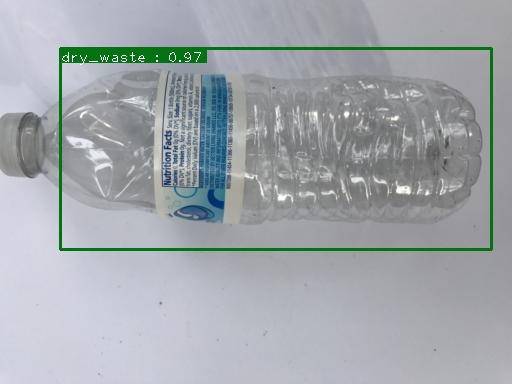

In [ ]:
img_path = "Waste_Dataset/Images_merged/plastic251.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

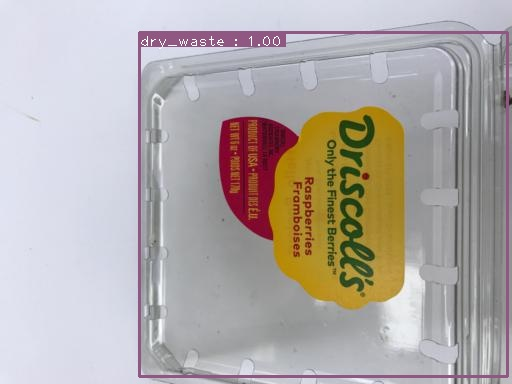

In [ ]:
img_path = "Waste_Dataset/Images_merged/plastic258.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

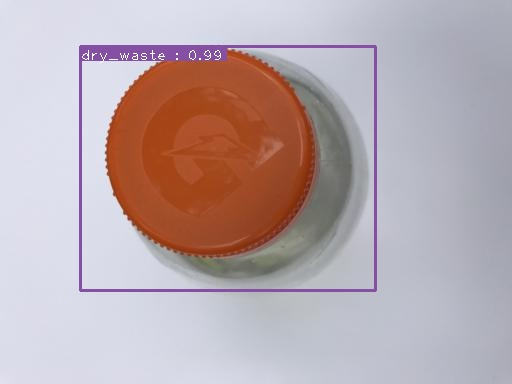

In [ ]:
img_path = "Waste_Dataset/Images_merged/plastic249.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

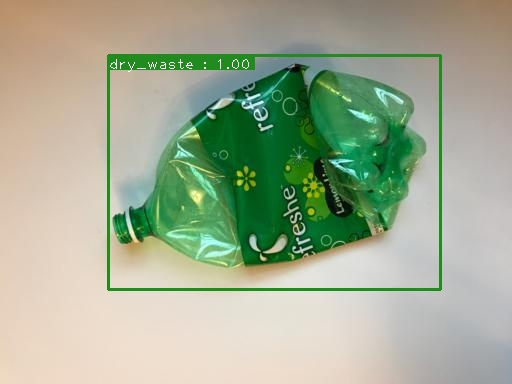

In [ ]:
img_path = "Waste_Dataset/Images_merged/plastic236.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

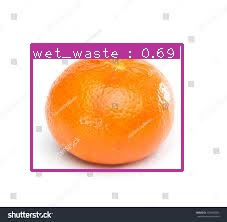

In [ ]:
img_path = "Waste_Dataset/Images_merged/O_41.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

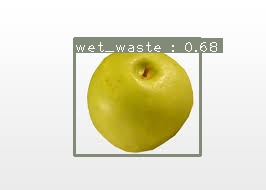

In [ ]:
img_path = "Waste_Dataset/Images_merged/O_37.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

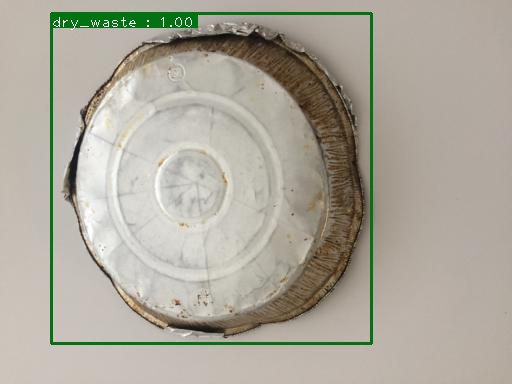

In [ ]:
img_path = "Waste_Dataset/Images_merged/metal170.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

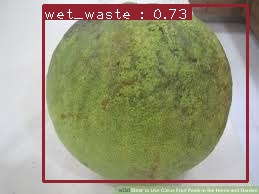

In [ ]:
img_path = "Waste_Dataset/Images_merged/image104.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

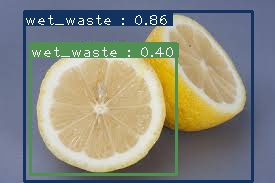

In [ ]:
img_path = "Waste_Dataset/Images_merged/image107.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

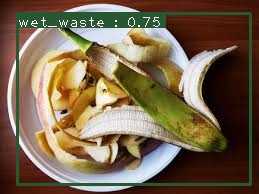

In [ ]:
img_path = "Waste_Dataset/Images_merged/image117.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')